<a href="https://colab.research.google.com/github/gitblankhub/Baf/blob/main/%EA%B8%B0%ED%9B%84%EA%B8%B0%EC%88%A0%EB%B6%84%EB%A5%98/trials/%EA%B8%B0%ED%9B%84%EB%B6%84%EB%A5%98_0115_LSTM_%26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기후기술 분석

train.csv :
- train 데이터
- 기후기술분류 label 포함
- train.shape: (174304, 13)

test.csv :
- test 데이터
- 기후기술분류 label 미포함
- test.shape: (43576, 12)




sample_submission.csv :
- sample_submission 데이터
- sample_submission.shape: (43576, 2)


labels_mapping.csv :
- label과 기후기술분류체계를 mapping 한 meta data






https://wikidocs.net/106473


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#설치하고 런타임 재시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 50 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existen

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1-py3
!pip3 install konlpy
!JAVA_HOME="C:\Program Files\Java\jdk-16.0.2"


Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [867 kB]
Hit:13 http://ppa.laun

In [ ]:
!pip install dataprep

     |████████████████████████████████| 3.5 MB 4.3 MB/s 
     |████████████████████████████████| 943 kB 61.7 MB/s 
     |████████████████████████████████| 366 kB 62.4 MB/s 
     |████████████████████████████████| 63 kB 2.9 MB/s 
     |████████████████████████████████| 848 kB 61.4 MB/s 
     |████████████████████████████████| 158 kB 49.7 MB/s 
     |████████████████████████████████| 1.1 MB 61.4 MB/s 
     |████████████████████████████████| 10.9 MB 53.6 MB/s 
     |████████████████████████████████| 1.5 MB 40.6 MB/s 
     |████████████████████████████████| 719 kB 55.4 MB/s 
     |████████████████████████████████| 160 kB 60.6 MB/s 
     |████████████████████████████████| 271 kB 64.4 MB/s 
     |████████████████████████████████| 192 kB 78.9 MB/s 
     |████████████████████████████████| 133 kB 60.9 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 1.5 MB 49.7 MB/s 
     |████████████████████████████████| 1.5 MB 55.6 MB/s 
     |████████████

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
#파일 읽기
import pandas as pd
import numpy as np


train=pd.read_csv('/content/drive/MyDrive/open/train.csv')
test=pd.read_csv('/content/drive/MyDrive/open/test.csv')
sample=pd.read_csv('/content/drive/MyDrive/open/sample_submission.csv')
label=pd.read_csv('/content/drive/MyDrive/open/labels_mapping.csv')


In [ ]:
import re #정규화 표현식

In [ ]:
import seaborn as sns

In [ ]:
from dataprep.eda import plot_missing

NumExpr defaulting to 2 threads.


## exploration

### train data

- train 데이터
- 기후기술분류 label 포함
- train.shape: (174304, 13)

In [ ]:
train.shape

(174304, 13)

In [ ]:
train.head()

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
0,0,2016,농업기초기반연구,농촌진흥청,신규,농산물안전성연구,유전정보를 활용한 새로운 해충 분류군 동정기술 개발,○ 새로운 해충분류군의 동정기술 개발 및 유입확산 추적,(가) 외래 및 돌발해충의 발생조사 및 종 동정\n\n\n ○ 대상해충 : 최...,"○ 새로운 돌발 및 외래해충의 신속, 정확한 동정법 향상\n\n\n○ 돌발 및 외래...","뉴클레오티드 염기서열, 분자마커, 종 동정, 침샘, 전사체","nucleotide sequence, molecular marker, species...",24
1,1,2019,이공학학술연구기반구축(R&D),교육부,신규,지역대학우수과학자지원사업(1년~5년),대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...,최종목표: TRAIL 감수성 표적 유전자를 발굴하고 내성제어 기전을 연구. 발굴된...,1차년도\n1) Microarray를 통한 선천적 TRAIL 내성 표적 후보 유전자...,"1) TRAIL 내성 특이적 표적분자를 발굴하고, 이를 이용한 TRAIL 효과 증진...","대장암,항암제 내성,세포사멸,유전자발굴","TRAIL,Colorectal cancer,TRAIL resistance,Apopt...",0
2,2,2016,중소기업기술혁신개발,중소기업청,신규,혁신기업기술개발,비목질계 셀룰로오스 식물자원을 활용한 기능성 부직포 및 고부가가치 뷰티케어 faci...,* 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n* 소비자 및 바...,* 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n- Tencel/...,* 국내 독자적인 비목질계 셀룰로오스 자원의 파이버 및 부직포 제조 등의 기술 확보...,"기능성 샐룰로오스 파이버,천연섬유,기능성 부직포,뷰티&amp;케어 제품,미용 솜","functional cellulose fiber,natural fiber,funct...",0
3,3,2018,창업성장기술개발(R&D),중소벤처기업부,신규,창업사업화연계과제,소화기 암 진단용 분자영상 형광프로브 개발,# 암특이적 바이오마커 발굴 및 바이오마커에 대한 프로브 개발\n\n\n1) 소화...,# 소화기 암 진단용 분자영상 형광프로브 개발\n\n\n- 국소 도포형 소화기 암 ...,# 암 진단기술의 차별성: 소화기 암 특이 프로브 개발\n\n\n- 최근 체외진단시...,"분자 진단,형광 조영제,프로브,항체,대장암","Molecular diagnosis,Fluorescence,probe,antibod...",0
4,4,2016,이공학개인기초연구지원,교육부,계속,기본연구지원,위암환자의 항암제반응예측을 위한 BRCA 발현검사,"수술이 불가능한 위암환자는 생존기간은 10개월 안팎에 지나지 않고, 항암화학요법에 ...",-In situ hybridization 검사의 정확성을 확인하기 위해 위암세포주 ...,-본 연구는 파라핀보관조직에서 in situ hybridization로 mRNA 및...,"BRCA,제자리부합법,조직미세배열,마이크로RNA,위암,항암제반응,젊은 연령/가족성 위암","BRCA,Insituhybridization,tissuemicroarray,micr...",0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174304 entries, 0 to 174303
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   index      174304 non-null  int64 
 1   제출년도       174304 non-null  int64 
 2   사업명        174304 non-null  object
 3   사업_부처명     174304 non-null  object
 4   계속과제여부     174304 non-null  object
 5   내역사업명      174304 non-null  object
 6   과제명        174304 non-null  object
 7   요약문_연구목표   171302 non-null  object
 8   요약문_연구내용   171303 non-null  object
 9   요약문_기대효과   171253 non-null  object
 10  요약문_한글키워드  171276 non-null  object
 11  요약문_영문키워드  171217 non-null  object
 12  label      174304 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 17.3+ MB


In [ ]:
train.isna().sum()

index           0
제출년도            0
사업명             0
사업_부처명          0
계속과제여부          0
내역사업명           0
과제명             0
요약문_연구목표     3002
요약문_연구내용     3001
요약문_기대효과     3051
요약문_한글키워드    3028
요약문_영문키워드    3087
label           0
dtype: int64

### test data

- test 데이터
- 기후기술분류 label 미포함
- test.shape: (43576, 12)

In [ ]:
test.shape

(43576, 12)

In [ ]:
test.head()

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드
0,174304,2016,경제협력권산업육성,산업통상자원부,신규,자동차융합부품,R-FSSW 기술 적용 경량 차체 부품 개발 및 품질 평가를 위한 64채널 C-SC...,○ 차체 점용접부의 품질 검사를 위한 64채널 무선 기반 C-Scan 탐촉자 개발\...,○ 1차년도\n\n . 개발 탐촉 시스템의 성능 평가 위한 표준 시편 제작 시...,○ 기술적 파급효과\n\n - 본 연구에서 개발된 R-FSSW 접합 기술은 기존 ...,"마찰교반점용접, 비파괴 검사, 초음파 탐상, 씨 스캔, 용접 품질 평가","Friction Stir Spot Welding, Non-destructive ev..."
1,174305,2018,개인기초연구(과기정통부)(R&D),과학기술정보통신부,계속,신진연구(총연구비5천이상~1.5억이하),다입자계를 묘사하는 편미분방정식에 대한 연구,자연계에는 입자의 개수가 아주 큰 다양한 다입자계가 존재한다. 이런 다입자계의 효...,연구과제1. 무한입자계의 동역학 / 작용소(operator) 방정식에 대한 연구\n...,본 연구는 물리학에서 중요한 대상인 다입자계를 묘사하는 모델방정식의 정당성을 보장하...,"다체계 방정식,동역학의 안정성,양자역학,고전역학,평균장 극한,고전극한,비상대론적 극한","many particle system,stability of dynamics,qua..."
2,174306,2017,개인기초연구(미래부),과학기술정보통신부,계속,자유공모,저출생체중아 가족을 위한 지역사회중심의 퇴원후 추후관리프로그램 개발,"저출생체중아는 정상 체중 출생아에 비하여 운동, 정신, 행동 및 정서발달장애가 빈번...",본 연구는 퇴원 후 저출생체중아의 퇴원 후 추후관리 프로그램 중 가정방문 모델과 가...,본 연구는 저출생체중아 가족 대상의 지역사회기반의 추후관리 사업에 대한 구체적인 모...,"저출생체중아,추후관리,조기개입,자조모임,가정방문","lowbirthweightinfant,followup,earlyinterventio..."
3,174307,2018,산학연협력기술개발(R&D),중소벤처기업부,신규,전략 협력(지역유망),폴리싱용 5축 CNC 정밀 마이크로 시스템 개발,최근 초정밀 공작기계 시장의 트렌드를 살펴보면 다음과 같다.\n\n\n(1) 자동차...,(1) 0.5~1㎛의 가공정밀도(면조도) 구현\n\n\n - 국내에서는 연삭기를 제...,(1) 가공 공정 및 소요시간 단축\n\n\n 초정밀금형 가공시 정삭 후 추가적...,"초정밀가공,폴리싱 가공,마이크로,경면가공,난삭재가공","superprecision,hiprecision,micro,mirror like f..."
4,174308,2019,이공학학술연구기반구축(R&D),교육부,계속,지역대학우수과학자지원사업(1년~5년),다결정재료의 미세조직구조를 고려한 확률론적 응력부식균열 생성예측모델 개발,본 연구의 최종목표는 다결정 금속재료의 미세조직구조를 고려한 확률론적 응력부식균열(...,"총 연구기간은 3년으로, 연차별 연구내용 및 범위는 다음과 같다.\n\n ∙ 1차...",본 연구의 중요성 및 활용가능성은 다음과 같다.\n\n ∙ 기존의 재료전체 ave...,"결정구조,응력부식균열,확률론적모델","Crystalline structure,Stress corrosion crackin..."


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43576 entries, 0 to 43575
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      43576 non-null  int64 
 1   제출년도       43576 non-null  int64 
 2   사업명        43576 non-null  object
 3   사업_부처명     43576 non-null  object
 4   계속과제여부     43576 non-null  object
 5   내역사업명      43576 non-null  object
 6   과제명        43576 non-null  object
 7   요약문_연구목표   42821 non-null  object
 8   요약문_연구내용   42821 non-null  object
 9   요약문_기대효과   42815 non-null  object
 10  요약문_한글키워드  42816 non-null  object
 11  요약문_영문키워드  42804 non-null  object
dtypes: int64(2), object(10)
memory usage: 4.0+ MB


In [ ]:
test.isna().sum()

index          0
제출년도           0
사업명            0
사업_부처명         0
계속과제여부         0
내역사업명          0
과제명            0
요약문_연구목표     755
요약문_연구내용     755
요약문_기대효과     761
요약문_한글키워드    760
요약문_영문키워드    772
dtype: int64

### submission

In [ ]:
sample.head()

,index,label
0,174304,0
1,174305,0
2,174306,0
3,174307,0
4,174308,0


### label

In [ ]:
label

,label,소분류
0,0,00. NaN
1,1,01. 원자력 발전
2,2,02. 핵융합 발전
3,3,03. 청정화력발전·효율화
4,4,04. 수력
5,5,05. 태양광
6,6,06. 태양열
7,7,07. 지열
8,8,08. 풍력
9,9,09. 해양에너지


## konlpy) kkma komoran okt

In [ ]:
from konlpy.tag import Kkma
kkma = Kkma()

In [ ]:
kkma.morphs('유전정보를 활용한 새로운 해충 분류군 동정기술 개발')

['유전',
 '정보',
 '를',
 '활용',
 '하',
 'ㄴ',
 '새',
 '롭',
 'ㄴ',
 '해충',
 '분류',
 '군',
 '동정',
 '기술',
 '개발']

In [ ]:
from konlpy.tag import Komoran
komoran = Komoran()

In [ ]:
komoran.morphs('유전정보를 활용한 새로운 해충 분류군 동정기술 개발')

['유전', '정보', '를', '활용', '하', 'ㄴ', '새롭', 'ㄴ', '해충', '분류군', '동정', '기술', '개발']

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
okt.morphs('유전정보를 활용한 새로운 해충 분류군 동정기술 개발')

['유전', '정보', '를', '활용', '한', '새로운', '해충', '분류군', '동정', '기술', '개발']

## EDA

### 결측치(train & test)

In [ ]:
train.isna().sum()

index           0
제출년도            0
사업명             0
사업_부처명          0
계속과제여부          0
내역사업명           0
과제명             0
요약문_연구목표     3002
요약문_연구내용     3001
요약문_기대효과     3051
요약문_한글키워드    3028
요약문_영문키워드    3087
label           0
dtype: int64

In [ ]:
train[train['요약문_기대효과'].isna()]

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
34,34,2019,과학기술연합대학원대학교연구운영비지원(R&D)(운영경비),과학기술정보통신부,계속,과학기술연합대학원대학교연구운영비지원,과학기술연합대학원대학교 운영비,NaN,NaN,NaN,NaN,NaN,0
108,108,2017,한국과학기술원연구운영비지원(0.5),과학기술정보통신부,계속,글로벌교육연구선도사업,미래형융합교육프로그램운영,NaN,NaN,NaN,NaN,NaN,0
205,205,2017,지방대학육성사업(0.5),교육부,계속,지방대학 특성화사업,환경친화형 융복합 기계부품 창의 인재 양성 사업단,NaN,NaN,NaN,NaN,NaN,0
321,321,2019,국가과학기술연구회연구운영비지원(R&D)(주요사업비),과학기술정보통신부,계속,출연(연)지원육성사업,출연(연) 지원육성사업,NaN,NaN,NaN,NaN,NaN,0
328,328,2018,국민안전증진기술개발(R&D),산업통상자원부,계속,사회문제해결형 다부처공동사업,2017 사회문제해결형R&D 다부처 공동시범사업(평가관리),NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174139,174139,2016,소재부품산업기술개발기반구축,산업통상자원부,계속,기획평가관리비,소재부품산업기술개발기반구축 평가관리비,NaN,NaN,NaN,NaN,NaN,0
174173,174173,2017,미래해양자원기술개발,해양수산부,계속,기획평가관리비,미래해양자원기술개발 기획평가관리비,NaN,NaN,NaN,NaN,NaN,0
174174,174174,2017,포스트게놈신산업육성을위한다부처유전체사업(농림부),농림축산식품부,계속,기획평가관리비,포스트게놈다부처유전체사업(농림부) 기획평가관리비,NaN,NaN,NaN,NaN,NaN,0
174230,174230,2018,한국과학기술원한국과학영재학교지원(R&D),과학기술정보통신부,계속,한국과학기술원한국과학영재학교지원,한국과학기술원 한국과학영재학교 운영비,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
test.isna().sum()

index          0
제출년도           0
사업명            0
사업_부처명         0
계속과제여부         0
내역사업명          0
과제명            0
요약문_연구목표     755
요약문_연구내용     755
요약문_기대효과     761
요약문_한글키워드    760
요약문_영문키워드    772
dtype: int64


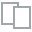
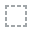
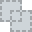
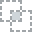
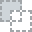
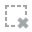
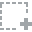
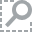
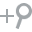
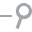
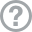
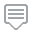
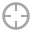
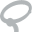
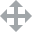
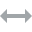
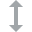
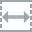
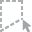
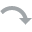
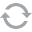
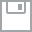
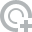
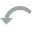
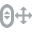
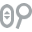
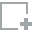
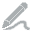
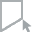
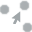
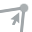
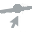

In [ ]:
plot_missing(train)
#dataprep 설치 필수


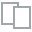
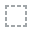
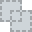
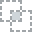
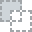
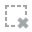
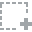
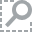
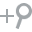
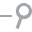
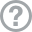
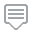
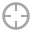
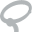
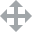
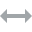
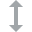
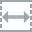
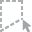
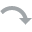
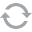
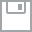
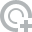
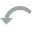
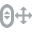
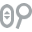
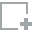
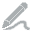
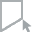
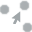
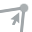
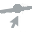

In [ ]:
plot_missing(test)

In [ ]:
#요약문_ 5개 열이 전부 na인 경우
train.loc[train.isna().sum(axis=1).eq(5)]

print("요약문이 전부 na인 행: ",train.loc[train.isna().sum(axis=1).eq(5)].shape[0]) #2972행


#na가 없는 데이터
print("na가 없는 행: ",train.loc[train.isna().sum(axis=1).eq(0)].shape[0]) #171138행

print("na가 1~4개 인 행: ",train.shape[0]-2972-171138)

요약문이 전부 na인 행:  2972
na가 없는 행:  171138
na가 1~4개 인 행:  194


In [ ]:
for a in range(1,5,1):
  display(train.loc[train.isna().sum(axis=1).eq(a)])
  print()

  print("~~~"*40)
  print()

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
2305,2305,2017,농업기술경영연구,농촌진흥청,계속,농업기술경영연구,농업 R&D 사전 경제성 분석 연구,농업 R&D 사전경제성 분석\n\n 농업 R&D 사전경제성 분석 개선 방안 도출,농업 R&D 사전경제성분석 평가체계 구축\n\n . 타기관 평가시스템 조사 및 진...,NaN,"사전경제성, 사후경제성","ex-ante economic analysis, post economic econo...",0
4814,4814,2017,농업기술경영연구,농촌진흥청,신규,농업기술경영연구,온라인 직거래 유형별 특성 분석 및 거래매뉴얼 개발,온라인 직거래 유형별 특성 분석 및 거래매뉴얼 개발\n\n 농식품의 국내외 온라인 ...,농&#8228;식품의 국내&#8228;외 온라인 직거래 변화 트랜드 분석\n\n 농...,NaN,"전자상거래, 온라인 쇼핑, 온라인 구매, 온라인 거래, 농산물 직거래","Electronic commerce, Online shopping, Online p...",0
6154,6154,2017,농업기술경영연구,농촌진흥청,계속,농업기술경영연구,"주요 특작(버섯, 인삼) 농업경영 핵심기술 개발 연구",○ 주요 품목의 통합 기본서 개발\n\n○ 주요 품목별 농업경영 핵심기술 개발,○ 특용작물분야 농업경영 핵심기술 개발 연구\n\n 대상작목 : (2년차) 버섯 ...,NaN,"수익성, 유통구조, 핵심기술","Profitability, Marketing Channels, Core Techno...",0
9026,9026,2016,학교기업지원사업,교육부,신규,학교기업지원사업,DIT스포츠재활센터,스포츠활동에 따른 신체 손상 후 의료적인 치료가 끝난 운동선수들이 완전하게 훈련 및...,학생들의 현장실습을 통한 스포츠재활 분야의 전문기술 인력 양성\n\n\n실무를 중심...,스포츠재활산업은 의료와 스포츠의 틈새시장으로 스포츠 현장에서 일어나는 사고를 예방하...,스포츠재활,NaN,0
11875,11875,2017,농업기술경영연구,농촌진흥청,계속,농업기술경영연구,수박·참외 농업경영 핵심기술 개발 연구,○ 주요 품목의 통합 기본서 개발\n\n○ 주요 품목별 농업경영 핵심기술 개발,○ 채소작물분야 농업경영 핵심기술 개발 연구\n\n 대상작목 : (2년차) 수박 ...,NaN,"수익성, 유통구조, 핵심기술","Profitability, Marketing Channels, Core Techno...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160973,160973,2019,산학협력고도화지원(R&D),교육부,신규,지역선도대학 육성사업(2019),"스마트 농생명,연기금 콰르텟(Quartet) 구축",지방대학이 지자체-지방 소재 공공기관-산업계와 협력하여 지역인재 공동양성 및 취업 ...,지역발전의 핵심주체인 지방대학-지자체-공공기관-산업계가 관련 직무 역량․특성을 분석...,지역우수인재 양성 체계로서 지방대학-지자체-공공기관-산업계가 협력 클러스터를 구축하...,"대학간 연계교류, 지역사회 연계 협력, 지역 우수인재 유치 양성",NaN,0
161262,161262,2019,산학협력고도화지원(R&D),교육부,신규,지역선도대학 육성사업(2019),지속가능 지역발전을 위한 미래선도 스마트 인재 양성,지방대학이 지자체-지방 소재 공공기관-산업계와 협력하여 지역인재 공동양성 및 취업 ...,지역발전의 핵심주체인 지방대학-지자체-공공기관-산업계가 관련 직무 역량․특성을 분석...,지역우수인재 양성 체계로서 지방대학-지자체-공공기관-산업계가 협력 클러스터를 구축하...,"대학간 연계교류, 지역사회 연계 협력, 지역 우수인재 유치 양성",NaN,0
169462,169462,2017,농업기술경영연구,농촌진흥청,계속,농업기술경영연구,미곡·콩 농업경영 핵심기술 개발 연구,○ 주요 품목의 통합 기본서 개발\n\n○ 주요 품목별 농업경영 핵심기술 개발,○ 식량작물분야 농업경영 핵심기술 개발 연구\n\n 대상작목 : (2년차) 미곡 ...,NaN,"수익성, 유통구조, 핵심기술","Profitability, Marketing Channels, Core Techno...",0
171487,171487,2017,신품종지역적응연구,농촌진흥청,신규,농업생명자원국가관리기관운영,영양체 유전자원 보존관리 2017(충북도원 작물연구과 홍성택),농업 유전자원의 수집 및 안정적인 보존 관리\n\n 약용식물 유전자원주요 특성평가,신규 영양체 생명자원 수집 : 백수오 등 50점\n\n 기존 보유자원 224점의 ...,NaN,"유전자원관리기관, 수집, 다양성","genebank, plant, collection, diversity",23



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
409,409,2016,첨단생산기술개발,농림축산식품부,계속,ICT융복합시스템,"일체형단말기 수집정보의 시스템 활용방안 개발(KAHIS, PigMos)",NaN,NaN,① 기술적 측면\n\n\n ？국가동물방역통합시스템(KAHIS) 및 AI센터통합관리시...,"국가동물방역통합시스템,AI센터통합관리시스템,질병발생 조기감지,질병전파 경로예측,이동...","KAHIS,PigMos,arly Detection of Disease Outbrea...",0
1348,1348,2016,첨단생산기술개발,농림축산식품부,계속,첨단기자재생산,개발 유기태화 미네럴 소재류의 효능평가 및 기능성농산물 생산연구,NaN,NaN,1. 기술적 측면\n\n\n○ 친환경 농업분야에서 절대적으로 요구되는 무기영양제 단...,"핵산류,미네럴,유기태화,시설원예용비료,기능성농산물","Nucleic Acid,mineral,conjucate,Horiculturefert...",0
15773,15773,2018,지역연구개발혁신지원(R&D),과학기술정보통신부,계속,연구개발지원단 육성지원,전북연구개발지원단 지원사업,ㅇ 2018년 전북연구개발지원단은 그간 추진해온 기능별 중점과업의 파급력을 극대화하...,ㅇ 과학기술 정책기획\n\n - 전북과학기술위원회 중심의 정책 개발·심의 및 기획 ...,ㅇ 지역 R&D 기획·조정체제 정립 및 효율적 R&D 투자를 구현하고 지역의 혁신역...,NaN,NaN,0
24533,24533,2016,산업전문인력역량강화,산업통상자원부,계속,인적자원생태계조성,2016 산업별 인적자원개발협의체 활성화 지원사업,산업계가 주도적으로 산업계의 수요를 체계적으로 발굴하여 정부 및 인력양성기관 등에 ...,산업 변화에 신속 대응\n\n * 미지정 주요 산업분야에 SC 지정\n\n * ...,산업계 인력 수요를 반영한 인력양성 . 공급을 위해 업종별 인력수급조사 및 교육훈련...,NaN,NaN,0
29284,29284,2016,과학기술인력육성지원기반구축,미래창조과학부,계속,과학문화 전문인력 양성 및 활용,2016년 과학문화 전문인력 양성 및 활용사업,과학해설사 역량강화를 통한 과학문화 전시해설 서비스 제고,과학관 근무자 역량강화 전문교육\n\n과학해설사 신규 및 인증기간 만료자 심화교육\...,관람객의 과학이해도 및 만족도 향상,NaN,NaN,0
33089,33089,2016,산업현장기술지원인프라조성,산업통상자원부,계속,산업현장기술지원인프라조성,중소기업의 제조기술혁신역량 강화를 위한 산학융합 플랫폼 구축,본 과제는 중소기업의 경쟁력 향상을 위해서 공간적-인적 융합을 통한 산학융합3.0 ...,1: 산학간 공간 융합을 통한 상시적 기술혁신 인프라 조성 \n\n\n1-1. 중소...,○ 공간적-인적 융합을 통한 산학융합3.0 플랫폼 구축으로 산업단지 내 중소기업의 ...,NaN,NaN,0
38496,38496,2016,기술확산지원(정보통신),미래창조과학부,계속,SW융합클러스터,송도 SW융합 클러스터 (인천 SW융합 BI-Plex),"o SW융합을 통해 인천지역의 특화전략산업인 바이오산업(BT), IT산업을 집중 육...",[세부내용 첨부파일 참조]\n\n\n o SW융합클러스터 송도센터 구축 및 운영\n...,[과제(사업)수행 측면]\n\n\n o 인천 SW융합 BI-Plex를 통해 인천지역...,NaN,NaN,0
42483,42483,2016,첨단생산기술개발,농림축산식품부,계속,첨단기자재생산,"파프리카, 토마토 온실 내 이송시스템 제작 및 성능시험",NaN,NaN,○ 품질관리 기술 향상으로 인한 국제 가격 경잭력 확보\n\n\n○ 작업차에 안전장...,"파프리카,토마토,이송기,작업차,덤핑 시스템","paprika,tomato,trolley,transferring machine,du...",0
44615,44615,2019,국가보건의료연구인프라구축(R&D),보건복지부,계속,국가보건의료연구인프라구축,2019-국가보건의료연구인프라구축을 위한 연구 추진 등,"1. 국가줄기세포은행 운영, 표준화, 국내외 네트워크 구축 및 국립줄기세포재생센터 ...",1. 줄기세포은행운영 및 표준화기반구축을 지원2. 여성건강기반기술개발연구 지원3. ...,"연구과제 기획, 내부과제 평가․관리, 학술용역과제 위탁평가, 연구성과 확산, 학술활...",NaN,NaN,36
45752,45752,2017,한국식품연구원연구운영비지원,과학기술정보통신부,계속,시설비,한국식품연구원 시설비,"노후장비 교체, 노후시설 보수, 고가장비구입, 경북본부 지역조직 설립 등","실험실 안전관리 강화 및 노후시설, 설비 등 개？보수\n\n\n장내미생물 유세포분석...","지역의 균형적인 발전에 필요한 지역조직 설립, 노후장비 및 노후시설 보수에 따른 연...",NaN,NaN,0



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
3681,3681,2017,개인기초연구(미래부),과학기술정보통신부,신규,전략공모,금융 위기 극복을 위한 인공지능 및 오피니언 마이닝을 이용한금융의사결정지원시스템 개발,NaN,NaN,NaN,"위기 예방,시그널 감지,인공지능,오피니언 마이닝,준지도 기계학습,정보 필터링,워드 ...","Crisis prevention,Signal detection,Artificial ...",0
11921,11921,2017,개인기초연구(미래부),과학기술정보통신부,신규,전략공모,형광형 나노자성비드와 결합된 항체를 이용한 경락연결망 가시화 기술 개발,NaN,NaN,NaN,"단클론 항체,경락 순환시스템,프리모 순환시스템,프리모 연결망,형광 나노자성비드,","Mono clone antibody,Kyungrak circulatory syste...",0
17696,17696,2017,개인기초연구(미래부),과학기술정보통신부,신규,전략공모,미토콘드리아 안에서의 펩타이드 자기조립에 의한 선택적 노화세포 제거를 통한 생체조직...,NaN,NaN,NaN,"재생의약,항노화신약,자기조립,노화세포,펩타이드,","regenerative medicine,ati-aging drug,self-asse...",0
18094,18094,2018,사회수요맞춤형인재양성사업(R&D),교육부,계속,여성공학인재양성,생애 지속형 여성 공학 글로벌 리더 양성사업단,대학별 특성과 여건에 맞는 여학생 맞춤형 공학교육 개선을 통한 공학분야 현장에 필요...,"여성 공대 졸업생에게 유망한 분야를 발굴하고 이에 적합한 교육과정을 개발, 운영하는...",NaN,NaN,NaN,0
22987,22987,2018,사회수요맞춤형인재양성사업(R&D),교육부,계속,여성공학인재양성,KS W3 여성공학 인재양성사업단,대학별 특성과 여건에 맞는 여학생 맞춤형 공학교육 개선을 통한 공학분야 현장에 필요...,"여성 공대 졸업생에게 유망한 분야를 발굴하고 이에 적합한 교육과정을 개발, 운영하는...",NaN,NaN,NaN,0
35889,35889,2018,사회수요맞춤형인재양성사업(R&D),교육부,계속,여성공학인재양성,여성공학 4.0 인재 양성사업단,대학별 특성과 여건에 맞는 여학생 맞춤형 공학교육 개선을 통한 공학분야 현장에 필요...,"여성 공대 졸업생에게 유망한 분야를 발굴하고 이에 적합한 교육과정을 개발, 운영하는...",NaN,NaN,NaN,0
36325,36325,2017,원자력국제협력기반조성,과학기술정보통신부,신규,원자력국제협력기반조성,소형위성을 활용한 우주과학 국제협력 선진화 연구,NaN,NaN,NaN,"우주과학,소형위성,우주과학위원회,국제협력,우주정책,","Space Science,Small Satellite,COSPAR,Internati...",0
38644,38644,2017,개인기초연구(미래부),과학기술정보통신부,신규,전략공모,조현병 환자의 사회적 기능 및 사회성 저하 문제를 해결하기 위한 안구추적장치 기반 ...,NaN,NaN,NaN,"조현병,얼굴 표정 인식,사회기술훈련,","Schizophrenia,Facial emotion recognition,Socia...",0
54060,54060,2017,개인기초연구(미래부),과학기술정보통신부,신규,자유공모,플래시 메모리 기반 저장 장치를 사용하는 시스템의 사용자 QoS (Quality o...,NaN,NaN,NaN,"플래시 메모리,QoS,가비지 컬렉션,프로그램 분석,조인 쿼리,멀티채널 구조","Flash Memory,QoS,Garbage Collection,Program An...",0
55654,55654,2017,개인기초연구(미래부),과학기술정보통신부,신규,전략공모,분자수준의 자연 잎 모사 태양광촉매를 이용한 친환경 초미세먼지 및 대기오염 저감기술 개발,NaN,NaN,NaN,"자연 잎 모방 태양광촉매,이종금속 태양광촉매,분자수준 광촉매,대기오염,초미세먼지 유...","photocatalysts mimicking plant leaves,polynucl...",45



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
10816,10816,2019,국가기록관리활용기술연구개발(R&D),행정안전부,계속,연구개발 사업 전문성 강화 및 운영관리,2019년 국가기록원 연구개발 운영관리,NaN,·,NaN,NaN,NaN,0
13826,13826,2017,한국에너지기술연구원연구운영비지원,과학기술정보통신부,신규,기관고유,출연연 융합연구사업,출연연 융합연구사업,NaN,NaN,NaN,NaN,0
55489,55489,2018,한국에너지기술연구원연구운영비지원(주요사업비),과학기술정보통신부,계속,기관고유,출연연 융합연구사업,"정부출연연구기관 융합연구사업 - FEP,KSB,CCP 등 연구회 주관",NaN,NaN,NaN,NaN,0



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [ ]:
#이상 데이터


train.loc[[71963,10816]]

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
71963,71963,2016,첨단생산기술개발,농림축산식품부,계속,ICT융복합시스템,"주요 과채류 작형, 생육단계별 양액 요구량 시험 및 시작품 현장실증",NaN,NaN,NaN,",,,,",",,,,",0
10816,10816,2019,국가기록관리활용기술연구개발(R&D),행정안전부,계속,연구개발 사업 전문성 강화 및 운영관리,2019년 국가기록원 연구개발 운영관리,NaN,·,NaN,NaN,NaN,0


### column 별



In [ ]:
# 전체 train 데이터 개수 대비 각 컬럼 당 unique 값 개수
print(train.drop("label", axis=1).apply(lambda x: x.nunique()))

index        174304
제출년도              4
사업명            1414
사업_부처명           28
계속과제여부            2
내역사업명          4324
과제명          106623
요약문_연구목표     133267
요약문_연구내용     146499
요약문_기대효과     136041
요약문_한글키워드    109125
요약문_영문키워드    115513
dtype: int64


In [ ]:
# 전체 test 데이터 개수 대비 각 컬럼 당 unique 값 개수
print(test.apply(lambda x: x.nunique()))

index        43576
제출년도             4
사업명           1158
사업_부처명          28
계속과제여부           2
내역사업명         3080
과제명          37857
요약문_연구목표     39157
요약문_연구내용     40254
요약문_기대효과     39332
요약문_한글키워드    36634
요약문_영문키워드    37386
dtype: int64


#### label

In [ ]:
train['label'].value_counts(sort=False)

0     142571
1       1261
2        275
3        143
4         57
5       1698
6         78
7        113
8        339
9        106
10       658
11       200
12       268
13       575
14      1672
15       165
16       506
17       154
18      1550
19      4938
20      1059
21       496
22       148
23      1840
24      3520
25       810
26       316
27       620
28       449
29      1028
30       234
31       922
32       260
33       533
34       523
35       291
36      1060
37       266
38       262
39       202
40       441
41        67
42        51
43       351
44        91
45      1137
Name: label, dtype: int64

In [ ]:
train['label'].value_counts(sort=False) / len(train)

0     0.817945
1     0.007234
2     0.001578
3     0.000820
4     0.000327
5     0.009742
6     0.000447
7     0.000648
8     0.001945
9     0.000608
10    0.003775
11    0.001147
12    0.001538
13    0.003299
14    0.009592
15    0.000947
16    0.002903
17    0.000884
18    0.008893
19    0.028330
20    0.006076
21    0.002846
22    0.000849
23    0.010556
24    0.020195
25    0.004647
26    0.001813
27    0.003557
28    0.002576
29    0.005898
30    0.001342
31    0.005290
32    0.001492
33    0.003058
34    0.003001
35    0.001669
36    0.006081
37    0.001526
38    0.001503
39    0.001159
40    0.002530
41    0.000384
42    0.000293
43    0.002014
44    0.000522
45    0.006523
Name: label, dtype: float64

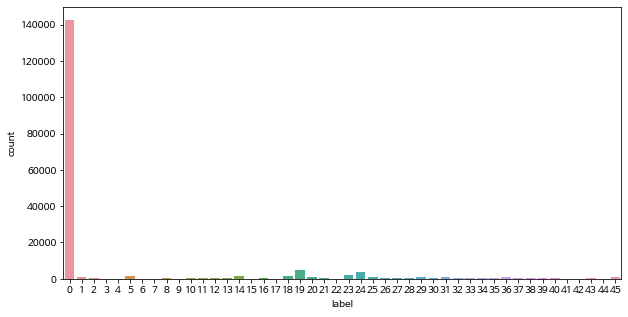

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=train,x='label')

In [ ]:
train['제출년도'].value_counts(sort=False)

2016    37685
2017    42766
2018    45018
2019    48835
Name: 제출년도, dtype: int64

#### 사업명/사업_부처명/계속과제여부/내역사업명/과제명

In [ ]:
#train 사업명
train['사업명'].value_counts(sort=False)

한국연구재단연구운영비지원(R&D)(운영경비)                                   1
재창업기업아이디어신제품개발사업                                          22
6개월챌린지및엑셀러레이터연계지원                                        157
주거환경연구사업(R&D)                                             34
한국전기연구원광주전력변환연구시험센터지원(R&D)                                 2
                                                        ... 
방역연계범부처감염병R&D사업(R&D)(복지부, 과기정통부, 농식품부, 식약처, 환경부, 행안부)     46
중소기업기술사업화역량강화(R&D)                                        69
산림과학연구                                                   134
원자력기초연구지원사업(R&D)                                          23
재료연구소연구운영비지원                                              78
Name: 사업명, Length: 1414, dtype: int64

In [ ]:
train.사업명.value_counts(normalize=True).mul(100).to_frame().head(10) #mul(100) 100곱한값

,사업명
개인기초연구(과기정통부)(R&D),9.336561
개인기초연구(교육부)(R&D),6.724458
개인기초연구(미래부),3.630439
개인기초연구(교육부),3.240889
개인연구지원,2.544979
이공학개인기초연구지원,2.453185
이공학학술연구기반구축(R&D),2.435974
창업성장기술개발(R&D),2.396962
산학연협력기술개발,2.363113
산학연협력기술개발(R&D),2.075684


In [ ]:
#test 사업명
test['사업명'].value_counts(sort=False)

에너지인력양성(전력기금)                       35
ICT유망기술개발지원(R&D)                    24
환경산업선진화기술개발사업                       22
1세대스마트플랜트팜고도화및실증(R&D)               20
소형무인비행기인증기술개발(R&D)                   2
                                    ..
국민위해인자에대응한기체분자식별분석기술개발(R&D)(환경부)     2
한국에너지기술연구원연구운영비지원                   13
농림수산식품기술기획평가원                        1
세계김치연구소연구운영비지원(R&D)(주요사업비)           4
재료연구소연구운영비지원                        17
Name: 사업명, Length: 1158, dtype: int64

In [ ]:
test.사업명.value_counts(normalize=True).mul(100).to_frame().head(10)

,사업명
개인기초연구(과기정통부)(R&D),9.213787
개인기초연구(교육부)(R&D),6.400312
개인기초연구(미래부),3.609785
개인기초연구(교육부),3.215073
개인연구지원,2.701028
이공학개인기초연구지원,2.423352
창업성장기술개발(R&D),2.404994
이공학학술연구기반구축(R&D),2.386635
산학연협력기술개발,2.170920
산학연협력기술개발(R&D),2.049293


In [ ]:
#사업명 별 label 파악

def getmode(x):
  return x.value_counts().index[0]
train.groupby('사업명').agg({'label': ['nunique','count',getmode]} , ascending=[True,False]).head(20)


label              
                           nunique count getmode
사업명                                             
(비총액)국립수산과학원기본경비(R&D)            1     1       0
(총액)국립수산과학원공익요원경비(R&D)           1     1       0
(총액)국립수산과학원기본경비(R&D)             1     2       0
(총액)국립수산과학원인건비(R&D)              1     1       0
(총액)농림축산검역본부공익요원경비               1     1       0
(총액)농림축산검역본부기본경비                 1     2       0
(총액)농림축산검역본부인건비                  1     1       0
100세사회대응고령친화제품연구개발               1    36       0
100세사회대응고령친화제품연구개발(R&D)          1    31       0
1세대스마트애니멀팜고도화및실증(R&D)            3    28      25
1세대스마트애니멀팜산업화기술개발(R&D)           4    17      25
1세대스마트플랜트팜고도화및실증(R&D)            3    77      24
1세대스마트플랜트팜산업화기술개발(R&D)           2    28      24
3D/4D물리탐사연구선건조사업(R&D기반구축)        1     2       0
3D프린팅생활혁신융합기술개발(R&D)             1     7       0
3D프린팅의료기기산업기술실증사업(R&D)           1     5       0
6개월챌린지및엑셀러레이터연계지원                5   157       0
AI기반자율주행컴퓨팅모듈개발및서비스실증(R&D)       1     2      18
BK21플러스사업(0.5)                  34  2274       0
BK21플러스사업(R&D)                  34  2363       0

In [ ]:
#train 사업부처명
train['사업_부처명'].value_counts(sort=True)

과학기술정보통신부    42455
교육부          34336
중소벤처기업부      23364
산업통상자원부      15127
농촌진흥청        14715
미래창조과학부      10230
보건복지부         7522
중소기업청         5938
농림축산식품부       5879
해양수산부         3371
환경부           2324
국토교통부         2056
식품의약품안전처      1911
다부처           1429
산림청           1044
기상청            586
문화체육관광부        455
원자력안전위원회       402
행정안전부          321
범부처 사업         212
국민안전처          141
소방청            138
경찰청             95
해양경찰청           92
문화재청            81
특허청             38
행정자치부           35
기획재정부            7
Name: 사업_부처명, dtype: int64

In [ ]:
train.사업_부처명.value_counts(normalize=True).mul(100).to_frame()

,사업_부처명
과학기술정보통신부,24.356871
교육부,19.698917
중소벤처기업부,13.404167
산업통상자원부,8.678516
농촌진흥청,8.442147
미래창조과학부,5.869056
보건복지부,4.315449
중소기업청,3.406692
농림축산식품부,3.372843
해양수산부,1.933977


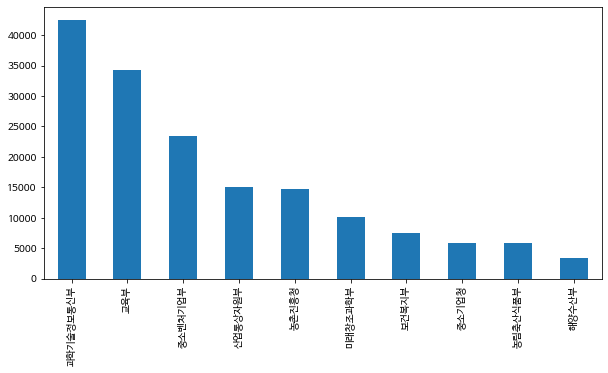

In [ ]:
plt.figure(figsize=(10,5))
train.사업_부처명.value_counts()[:10].plot.bar()

In [ ]:
#test 사업부처명
test.사업_부처명.value_counts(normalize=True).mul(100).to_frame()

,사업_부처명
과학기술정보통신부,24.497430
교육부,19.308794
중소벤처기업부,13.282541
산업통상자원부,8.931522
농촌진흥청,8.082431
미래창조과학부,6.056086
보건복지부,4.456582
농림축산식품부,3.602901
중소기업청,3.495043
해양수산부,1.923077


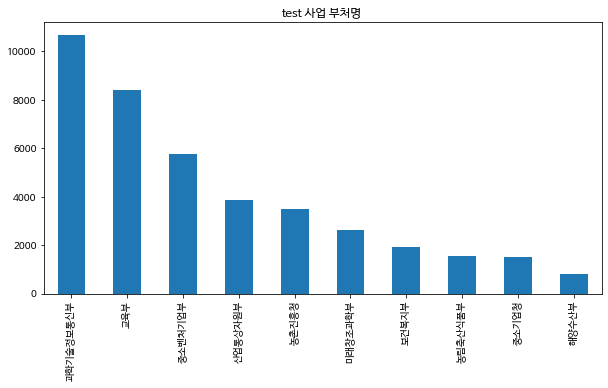

In [ ]:
plt.figure(figsize=(10,5))
test.사업_부처명.value_counts()[:10].plot.bar(title='test 사업 부처명 ')

In [ ]:
#label 최빈값
def getmode(x):
  return x.value_counts().index[0]


train.groupby('사업_부처명').agg({'label': ['nunique','count',getmode]})

#대부분의 부처가 0으로 분류.

label               
          nunique  count getmode
사업_부처명                          
경찰청             2     95       0
과학기술정보통신부      45  42455       0
교육부            45  34336       0
국민안전처           9    141       0
국토교통부          29   2056       0
기상청            14    586      31
기획재정부           1      7       0
농림축산식품부        25   5879       0
농촌진흥청          28  14715       0
다부처            29   1429       0
문화재청            1     81       0
문화체육관광부         3    455       0
미래창조과학부        44  10230       0
범부처 사업          7    212       0
보건복지부           5   7522       0
산림청            15   1044       0
산업통상자원부        42  15127       0
소방청             1    138       0
식품의약품안전처       10   1911       0
원자력안전위원회        2    402       0
중소기업청          38   5938       0
중소벤처기업부        44  23364       0
특허청             1     38       0
해양경찰청           5     92       0
해양수산부          24   3371       0
행정안전부          11    321       0
행정자치부           1     35       0
환경부            29   2324       0

In [ ]:
train['내역사업명'].value_counts(sort=True)

자유공모                                  5934
기본연구(1년~3년)                           5115
기본연구지원사업                              4794
기본연구지원                                3841
기본연구(1년~5년)                           3667
                                      ... 
농림축산검역본부기본경비-2018                        1
미래국방혁신기술개발(R&D)(NRF)                     1
4차산업 선도, 플라즈마 탄소나노 융복합소재 거점기반 구축사업       1
긴급구조용지능형정밀측위핵심기술및시제품개발                   1
식량과학원기본경비(R&D,총액인건비비대상)                  1
Name: 내역사업명, Length: 4324, dtype: int64

#### *과제명

In [ ]:
train['과제명'].value_counts(sort=True)

보안과제정보                                                                    716
사회맞춤형산학협력선도대학(LINC+)육성(0.5)                                               185
해상부유식 LNG 벙커링 시스템 기술개발                                                     98
한국형 e-Navigation 서비스를 위한 핵심기술 연구개발                                         80
산학협력선도대학(LINC)육성(0.5)                                                      49
                                                                         ... 
미생물 유전자원 관리기관 2018                                                          1
안개재배 방식을 적용한 땅콩새싹 및 수경인삼으로부터 식품 제제·제형의 시제품 고급화                              1
2019년도 기관주요 총괄평가관리사업(1/1)                                                   1
집속초음파와 마이크로버블을 이용한 혈액-뇌 장벽의 확장을 통해 중추신경계 질환 치료 약물을 전달하는 약물표적 전달에 관한 연구      1
해양스포츠 레저산업 전문인력 육성 사업단                                                      1
Name: 과제명, Length: 106623, dtype: int64

In [ ]:
train['과제명']

0                              유전정보를 활용한 새로운 해충 분류군 동정기술 개발
1         대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...
2         비목질계 셀룰로오스 식물자원을 활용한 기능성 부직포 및 고부가가치 뷰티케어 faci...
3                                   소화기 암 진단용 분자영상 형광프로브 개발
4                               위암환자의 항암제반응예측을 위한 BRCA 발현검사
                                ...                        
174299                             혈관내막 증식을 치료하기 위한 표적분자 발굴
174300    삼킴곤란 개선을 위한 물성조절 식품시스템에서의 유동층과립 복합소재의 유변물성 변화 ...
174301                        식물 유전체 정보 고도화 및 핵심 유전자 군 진화연구
174302                     콩 유전자원 내건성, 내습성 대량평가 체계구축 및 자원선발
174303               광학적 위상 제어 기법을 적용한 디지털 홀로그래피 현미경 시스템 개발
Name: 과제명, Length: 174304, dtype: object

In [ ]:
type(train['과제명'])

pandas.core.series.Series

##### 길이 len

In [ ]:
train['과제명'].astype(str).apply(len)

0         28
1         53
2         71
3         23
4         27
          ..
174299    24
174300    51
174301    29
174302    32
174303    38
Name: 과제명, Length: 174304, dtype: int64

과제명 length 최대값 :  229
과제명 length 최소값 :  2
과제명 length 평균값 :  35.84252225995961
과제명 length 중간값 :  34.0


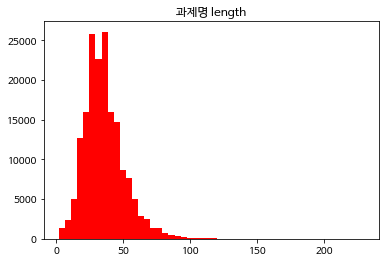

In [ ]:
plt.hist(train['과제명'].astype(str).apply(len),bins=50,color='red')
plt.title("과제명 length")
print("과제명 length 최대값 : ",max(train['과제명'].astype(str).apply(len)))
print("과제명 length 최소값 : ",min(train['과제명'].astype(str).apply(len)))
print("과제명 length 평균값 : ",train['과제명'].astype(str).apply(len).mean())
print("과제명 length 중간값 : ",train['과제명'].astype(str).apply(len).median())


{'boxes': [<matplotlib.lines.Line2D at 0x7febc4d82f90>],
 'caps': [<matplotlib.lines.Line2D at 0x7febc4d91050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7febc4d9a090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7febc4d91b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7febc4d8a590>,
  <matplotlib.lines.Line2D at 0x7febc4d8aad0>]}

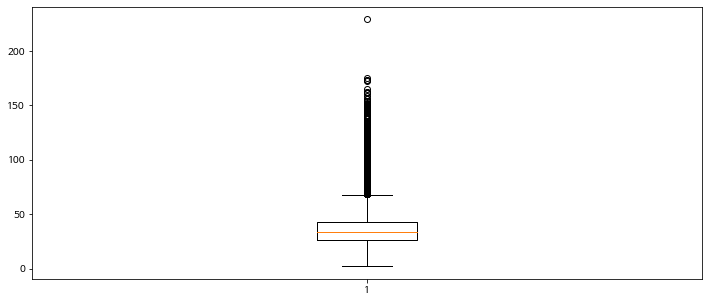

In [ ]:
plt.figure(figsize=(12,5))
plt.boxplot(train['과제명'].astype(str).apply(len))

In [ ]:
#과제명 길이 최솟값 2 , 중간값 34

train[train['과제명'].astype(str).apply(len)==2]['과제명']

for i in range(2,5,1):
  print(train[train['과제명'].astype(str).apply(len)==i]['과제명'])
  print()

#공백이거나 이상한 관측값은 없다

9407      아리
110338    시예
114161    아리
137635    아리
138140    팀플
Name: 과제명, dtype: object

1534      테스트
5879      EMF
9147      인건비
11474     인건비
12005     인건비
         ... 
164856    테스트
166483    시설비
167612    시설비
171980    화장품
172429    라오닐
Name: 과제명, Length: 101, dtype: object

2493      총괄과제
3839      총괄과제
4988      양자제어
6625      학사사업
8689      서울영상
          ... 
166498    시험분석
168402    애니모션
171637    시설보수
171849    연구장비
174058    부공테크
Name: 과제명, Length: 93, dtype: object



과제명 length 최대값 :  175
과제명 length 최소값 :  2
과제명 length 평균값 :  35.94480906921241
과제명 length 중간값 :  34.0


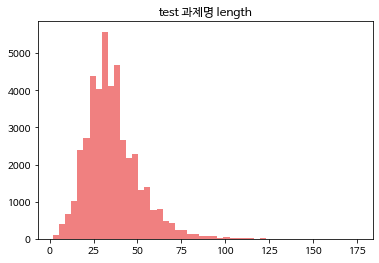

In [ ]:
#test 데이터 len

plt.hist(test['과제명'].astype(str).apply(len),bins=50,color='lightcoral')
plt.title("test 과제명 length")

print("과제명 length 최대값 : ",max(test['과제명'].astype(str).apply(len)))
print("과제명 length 최소값 : ",min(test['과제명'].astype(str).apply(len)))
print("과제명 length 평균값 : ",test['과제명'].astype(str).apply(len).mean())
print("과제명 length 중간값 : ",test['과제명'].astype(str).apply(len).median())

In [ ]:
for i in range(2,5,1):
  print(test[test['과제명'].astype(str).apply(len)==i]['과제명'])
  print()

15542    아리
Name: 과제명, dtype: object

1662     시설비
4725     시설비
9787     인건비
13994    라오닐
15361    시설비
18917    시설비
23199    우주론
25469    시설비
27361    시설비
27905    시설비
30131    우주론
30567    인건비
31652    경상비
31832    경상비
33018    시설비
33053    시설비
33629    간접비
39034    시설비
40021    앱버튼
40791    시설비
42695    시설비
42806    시설비
Name: 과제명, dtype: object

362      운영경비
1466     숙명아이
3091     애니모션
3293     학사사업
8905     근접센서
12183    원네이처
12683    양산제품
15042    CCRC
15885    본부과제
17151    숙명아이
17407    전략과제
19768    대경양조
20576    대경양조
21532    대경양조
22206    위상수학
22306    장비구입
22510    총괄과제
24277    시험분석
25278    더고구마
26125    창업2차
28166    KOOB
28584    제품측정
29308    대수기하
29528    시설보수
34208    서울영상
34291    WMTC
34639    원단검사
36669    대수기하
36882    숙명아이
37155    원네이처
38215    원네이처
42924    두원정밀
Name: 과제명, dtype: object



##### 동일한 과제명

In [ ]:
study_name=train['과제명'].value_counts()

In [ ]:
study_name.to_frame().head(10)
#보안과제 정보 많음

,과제명
보안과제정보,716
사회맞춤형산학협력선도대학(LINC+)육성(0.5),185
해상부유식 LNG 벙커링 시스템 기술개발,98
한국형 e-Navigation 서비스를 위한 핵심기술 연구개발,80
산학협력선도대학(LINC)육성(0.5),49
국제표준 선도기술 연구개발,39
연구장비 전문교육기관 지원,35
대학창의적자산실용화지원사업,35
해양플랜트 플로트오버 및 복수 크레인 설치설계 핵심기술개발,30
연안침식 관리 및 대응기술 실용화,30


In [ ]:
#보안과제정보인 행들
train[train['과제명']=='보안과제정보']


,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
132,132,2018,이공학학술연구기반구축(R&D),교육부,계속,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,0
274,274,2017,바이오.의료기술개발,과학기술정보통신부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,0
298,298,2017,BK21플러스사업(0.5),교육부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,0
643,643,2016,항공우주부품기술개발,산업통상자원부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,0
945,945,2017,개인기초연구(교육부),교육부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173113,173113,2018,개인기초연구(교육부)(R&D),교육부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,0
173190,173190,2018,개인기초연구(과기정통부)(R&D),과학기술정보통신부,계속,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,0
173855,173855,2019,국제연구인력교류(R&D),과학기술정보통신부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,0
173871,173871,2018,개인기초연구(교육부)(R&D),교육부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,0


In [ ]:
train[train['과제명']=='보안과제정보']['label'].value_counts()

#보안과제 정보 label이 다름

0     711
10      2
40      1
13      1
8       1
Name: label, dtype: int64

In [ ]:
test['과제명'].value_counts().to_frame().head(10)
#보안과제 정보

,과제명
보안과제정보,174
사회맞춤형산학협력선도대학(LINC+)육성(0.5),46
한국형 e-Navigation 서비스를 위한 핵심기술 연구개발,20
해상부유식 LNG 벙커링 시스템 기술개발,15
대학 창의적 자산 실용화 지원(BRIDGE+)사업,14
시설비,13
산학협력선도대학(LINC)육성(0.5),11
기술경영 전문대학원 지원사업,10
기초과학연구소,8
연구장비 전문교육기관 지원,7


##### 한글 영어 특수문자

In [ ]:
#한글외에 다른 문자(영어 숫자 특수문자)가 포함된 case
train[train['과제명'].str.contains('[^가-힣 ㄱ-ㅎ ㅏ-ㅣ]')==True]['과제명']

1         대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...
2         비목질계 셀룰로오스 식물자원을 활용한 기능성 부직포 및 고부가가치 뷰티케어 faci...
4                               위암환자의 항암제반응예측을 위한 BRCA 발현검사
5              국제 핵융합 재료조사시설(IFMIF)의 안정적 운전을 위한 고강도 빔 물리 연구
6                               마이크로시스를 적용한 옥내·외 겸용 광케이블 개발
                                ...                        
174288                         종양전이 억제 유전자 CD82의 면역조절 기능 연구
174292    Deep Realistic Synthetic Content 기반 상업용 영상 제작 ...
174293                                  현장진단(POCT) 진단키트의 개발
174294             양성자빔 조사에 따른 CIGS 화합물 반도체의 테라헤르츠 분광 특성 연구
174302                     콩 유전자원 내건성, 내습성 대량평가 체계구축 및 자원선발
Name: 과제명, Length: 82096, dtype: object

In [ ]:
train[train['과제명'].str.contains('[a-zA-Z]')==True].shape #영어가 포함된 행 56150

(56150, 13)

In [ ]:
print(okt.morphs('Sticky성0.1~0.5N/cm)과 접착성(10N/cm 이상)을 동시에 갖는 Adhesive Hot-melt Film 개발'))
print(okt.pos('Sticky성0.1~0.5N/cm)과 접착성(10N/cm 이상)을 동시에 갖는 Adhesive Hot-melt Film 개발'))

['Sticky', '성', '0.1', '~', '0.5', 'N', '/', 'cm', ')', '과', '접착', '성', '(', '10', 'N', '/', 'cm', '이상', ')', '을', '동시', '에', '갖는', 'Adhesive', 'Hot', '-', 'melt', 'Film', '개발']
[('Sticky', 'Alpha'), ('성', 'Noun'), ('0.1', 'Number'), ('~', 'Punctuation'), ('0.5', 'Number'), ('N', 'Alpha'), ('/', 'Punctuation'), ('cm', 'Alpha'), (')', 'Punctuation'), ('과', 'Noun'), ('접착', 'Noun'), ('성', 'Suffix'), ('(', 'Punctuation'), ('10', 'Number'), ('N', 'Alpha'), ('/', 'Punctuation'), ('cm', 'Alpha'), ('이상', 'Noun'), (')', 'Punctuation'), ('을', 'Josa'), ('동시', 'Noun'), ('에', 'Josa'), ('갖는', 'Verb'), ('Adhesive', 'Alpha'), ('Hot', 'Alpha'), ('-', 'Punctuation'), ('melt', 'Alpha'), ('Film', 'Alpha'), ('개발', 'Noun')]


In [ ]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

#### 요약문_연구목표

In [ ]:
train['요약문_연구목표'].astype(str).apply(len)

0           30
1          400
2          599
3         1552
4          476
          ... 
174299     283
174300     488
174301     694
174302      55
174303     600
Name: 요약문_연구목표, Length: 174304, dtype: int64

요약문_연구목표 length 최대값 :  3951
요약문_연구목표 length 최소값 :  1
요약문_연구목표 length 평균값 :  318.1008066366807
요약문_연구목표 length 중간값 :  249.0


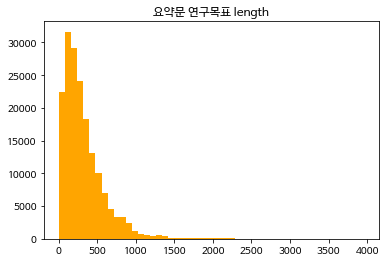

In [ ]:
plt.hist(train['요약문_연구목표'].astype(str).apply(len),bins=50,color='orange')
plt.title('요약문 연구목표 length')
print("요약문_연구목표 length 최대값 : ",max(train['요약문_연구목표'].astype(str).apply(len)))
print("요약문_연구목표 length 최소값 : ",min(train['요약문_연구목표'].astype(str).apply(len)))
print("요약문_연구목표 length 평균값 : ",train['요약문_연구목표'].astype(str).apply(len).mean())
print("요약문_연구목표 length 중간값 : ",train['요약문_연구목표'].astype(str).apply(len).median())

{'boxes': [<matplotlib.lines.Line2D at 0x7febc4d4f490>],
 'caps': [<matplotlib.lines.Line2D at 0x7febc4f3c410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7febc4ea4110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7febc4de52d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7febc4d4f650>,
  <matplotlib.lines.Line2D at 0x7febc4d4f890>]}

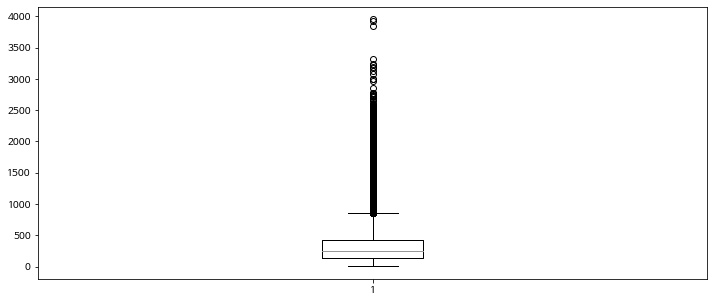

In [ ]:
plt.figure(figsize=(12,5))
plt.boxplot(train['요약문_연구목표'].astype(str).apply(len))

In [ ]:
#len == 1 인 경우
train[train['요약문_연구목표'].astype(str).apply(len)==1]

#0이 들어가있음



,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
7452,7452,2018,산학연협력기술개발(R&D),중소벤처기업부,신규,첫걸음 협력,GDI 엔진 350바 인젝터용 밸브시트 및 전용가공기 개발,0,0,0,"가솔린직접분사,인젝터,밸브시트,전용가공기,버","GDI,Injector,Valve seat,Processing machine,Burr",0
13176,13176,2018,개인기초연구(교육부)(R&D),교육부,계속,기본연구(1년~3년),알츠하이머 치매 조기 진단을 위한 EEG 빅 데이터의 클라우드 기반 기계학습,0,(1차년도) 알츠하이머 치매 진단을 위한 EEG 데이터 분석\n\n- (헤드셋) 국...,"ㅇ BCI 기술은 퇴형성 뇌질환 환자의 장애를 더욱 선제적으로 대처할 수, 궁극적으...","뇌 컴퓨터 인터페이스,알츠하이머,조기진단, 기계학습,빅데이터,클라우드,연산지능","Brain Computer Interface,Alzheimer,early diagn...",0
33682,33682,2017,창업성장기술개발,중소벤처기업부,신규,창업기업과제,EV 배터리 폭발 방지용 극소 소화시스템 개발,0,0,0,"자동소화시스템,노벡-1230,전기차배터리,친환경소화약제,파우치형 소화기","Automatic fire extinguisher,Novec-1230,EV batt...",19
73480,73480,2019,이공학학술연구기반구축(R&D),교육부,계속,리서치펠로우,반데르발스 에피탁시를 이용한 고품질 이차원 칼코게나이드 박막성장 및 전하이동 특성평...,0,◆ 1차년: 기판의 표면제어를 통한 2차원 물질 박막의 vdWE 성장.\n- 2차원...,◆ 학문적 기대효과\n- 2차원 물질의 구조-물성 상관관계 해석.\n- Van de...,"2차원 물질,칼코게나이드,박막성장,에피탁시,이종접합 구조,전하이동도,표면-계면 제어...","2D material,Chalcogenides,Thin film growth,Epi...",0
83063,83063,2017,개인기초연구(교육부),교육부,신규,기본연구지원사업,알츠하이머 치매 조기 진단을 위한 EEG 빅 데이터의 클라우드 기반 기계학습,0,(1차년도) 알츠하이머 치매 진단을 위한 EEG 데이터 분석\n\n- (헤드셋) 국...,"ㅇ BCI 기술은 퇴형성 뇌질환 환자의 장애를 더욱 선제적으로 대처할 수, 궁극적으...","뇌 컴퓨터 인터페이스,알츠하이머,조기진단, 기계학습,빅데이터,클라우드,연산지능","BrainComputerInterface,Alzheimer,earlydiagnosi...",0
90098,90098,2019,공정·품질기술개발(R&D),중소벤처기업부,신규,2019년 제3차 제품공정개선 기술개발사업(공정개선),드라이아이스 디버링을 통한 MPI엔진 인젝터용 밸브시트 제조 공정개선,0,&lt;주관기관 개발내용&gt;\n\n * MPI엔진 인젝터 밸브시트용 드라이아이...,"* 공정개선을 통하여, 상충되어 양립이 곤란한 두 가지 핵심 지표(버 제거율 및 시...","밸브시트,드라이아이스,디버링,인젝터,MPI엔진","valve seat,dryice,deburring,injector,MPI engine",19
95905,95905,2017,기술성과활용촉진,산업통상자원부,신규,R&D재발견프로젝트,고속중성자 기반 탐지기술로서 ICT를 융합한 투시·계측 등을 통하여 물자 및 부품의...,0,1. 주관기관((주)대한신성)\n\n\n 1) 탄환 및 포탄화약 고속중성자 투...,1. 기술적 측면\n\n\n o 미래 원천기술 확보\n\n\n\n\n\n 2....,"고속중성자 이미징,현장용 고속중성자 탐색 장치,씨씨디 센서,인공지능 이미징,","fast-neutron imaging,on-site fast neutron imag...",0
135849,135849,2019,창업성장기술개발(R&D),중소벤처기업부,신규,2019년도 창업성장기술개발사업 ‘디딤돌 창업과제’ 제3차 시행계획 공고,시내버스 엔진용 라디에이터 냉각 시스템 개발,0,0,0,"버스,엔진,라디에이터,냉각,시스템","BUS,ENGINE,RADIATOR,COOLING,SYSTEM",18
149512,149512,2016,이공학학술연구기반구축,교육부,신규,이공분야학문후속세대양성(박사후국외연수),숙주 박테리아의 CRISPR-Cas-매개 후천성 면역 체계에 대한 바이러스의 면역 ...,0,0,0,"크리스퍼-카스 면역 체계,유전자 교정 기술,숙주 미생물과 바이러스의 상호작용,진화적...","CRISPRCasimmunesystem,Genomeengineering,Hostmi...",0
157474,157474,2018,산학연협력기술개발(R&D),중소벤처기업부,신규,전략 협력(산연전용),에어갭(Air Gap)을 이용한 고 신뢰성 초고주파 커넥터 개발,0,- 40 GHz Connector 제품 설계\n\n\n- 커넥터 정밀 가공 기술 \...,0,"커넥터,초고주파,40기가헤르쯔,에어 갭,유전체","Connector,mmWave,40 GHz,Air Gap,Dielectric",0


In [ ]:
train['요약문_연구목표'].value_counts(sort=True).head(10)

#중복된 연구목표

대학·연구기관 등이 보유한 연구장비 및 소프트웨어를 중소기업에서 공동활용하도록 지원하여 국가장비의 활용도 제고 및 중소기업 기술경쟁력 향상 기반 마련                                                                           2041
보안과제정보                                                                                                                                                         716
평가관리비                                                                                                                                                          190
산업선도형 대학 육성을 통한 청년 취·창업 확대 및 중소기업 혁신 지원 등 국가경쟁력 강화                                                                                                             185
국가 혁신 성장을 주도할 미래형 창의인재 양성 체제 구축 등                                                                                                                              109
-IMO의 e-Navigation 도입에 선제적으로 대응함으로서 해양안전 확보 및 관련 기술에 대한 국제 표준을 선도함\n\n\n&#8729; 핵심 기술 개발 및 해사 디지털 인프라 확충을 통한 한국형 e-Navigation 서비스 체계 구축 및 국제 표준 선도 기술을 개발함      69
산학협력을 통해 대학교육 시스템을 개선함

In [ ]:
train[train['요약문_연구목표']=='대학·연구기관 등이 보유한 연구장비 및 소프트웨어를 중소기업에서 공동활용하도록 지원하여 국가장비의 활용도 제고 및 중소기업 기술경쟁력 향상 기반 마련']




,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
25,25,2017,산학연협력기술개발,중소벤처기업부,계속,연구장비공동활용지원,초박형 Narrow Bezel 고휘도 도광판(LGP) 사출용 미세패턴 금형개발,대학·연구기관 등이 보유한 연구장비 및 소프트웨어를 중소기업에서 공동활용하도록 지원...,연구개발을 목적으로 대학·연구기관 등이 보유한 연구장비를 활용하는 중소기업에게 온라...,대학 및 연구기관이 보유한 연구장비 공동활용율 증가 및 고가의 연구장비를 활용함에 ...,도광판 | 초정밀가공기 | 나노 | 네로우베젤 | 디스플레이,LGP | ULTRA PRECISION | NANO | NARROW BEZEL | ...,0
65,65,2017,산학연협력기술개발,중소벤처기업부,신규,연구장비공동활용지원,고강도 탄소복합소재 개발,대학·연구기관 등이 보유한 연구장비 및 소프트웨어를 중소기업에서 공동활용하도록 지원...,연구개발을 목적으로 대학·연구기관 등이 보유한 연구장비를 활용하는 중소기업에게 온라...,대학 및 연구기관이 보유한 연구장비 공동활용율 증가 및 고가의 연구장비를 활용함에 ...,탄소 | 복합소재 | 실리콘 | 나노 | 고강도,CARBON | COMPOSITE | SILICON | NANO | HIGH DEN...,0
143,143,2017,산학연협력기술개발,중소벤처기업부,신규,연구장비공동활용지원,"수장고,수장대 면진시스템 효율에 대한 조사",대학·연구기관 등이 보유한 연구장비 및 소프트웨어를 중소기업에서 공동활용하도록 지원...,연구개발을 목적으로 대학·연구기관 등이 보유한 연구장비를 활용하는 중소기업에게 온라...,대학 및 연구기관이 보유한 연구장비 공동활용율 증가 및 고가의 연구장비를 활용함에 ...,내진 | 면진 | 수장고 | 수장대 | 유물,earthquake proof | seismic Isolation | relic p...,0
168,168,2018,산학연협력기술개발(R&D),중소벤처기업부,신규,연구장비공동활용지원,스마트펜 신뢰성 시험 표준 규격 수립,대학·연구기관 등이 보유한 연구장비 및 소프트웨어를 중소기업에서 공동활용하도록 지원...,연구개발을 목적으로 대학·연구기관 등이 보유한 연구장비를 활용하는 중소기업에게 온라...,대학 및 연구기관이 보유한 연구장비 공동활용율 증가 및 고가의 연구장비를 활용함에 ...,스마트펜 | 필기데이터 | 네오스마트펜 | 네오노트 | 페이퍼튜브,smartpen | Ncode | Neo smartpen | Neo Notes | ...,0
248,248,2018,산학연협력기술개발(R&D),중소벤처기업부,신규,연구장비공동활용지원,결합력 강화 및 부식 방지 기능을 가진 철골 구조물용 인서트 볼트 개발,대학·연구기관 등이 보유한 연구장비 및 소프트웨어를 중소기업에서 공동활용하도록 지원...,연구개발을 목적으로 대학·연구기관 등이 보유한 연구장비를 활용하는 중소기업에게 온라...,대학 및 연구기관이 보유한 연구장비 공동활용율 증가 및 고가의 연구장비를 활용함에 ...,앙카 | 인서트볼트 | 스프링 | 데크플레이트 | 콘크리트,ANCHOR | INSERT BOLT | SPRING | DECK PLATE | C...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173843,173843,2017,산학연협력기술개발,중소벤처기업부,신규,연구장비공동활용지원,수소가스 중 황화합물 제거용 ZnO/고분자 섬유 제조,대학·연구기관 등이 보유한 연구장비 및 소프트웨어를 중소기업에서 공동활용하도록 지원...,연구개발을 목적으로 대학·연구기관 등이 보유한 연구장비를 활용하는 중소기업에게 온라...,대학 및 연구기관이 보유한 연구장비 공동활용율 증가 및 고가의 연구장비를 활용함에 ...,PAN 섬유 | 산화아연 나노막대 | 황 제거 | 연료전지 | 수소 연료,PAN Fiber | Nano Zincoxide Rod | Sulfur Remova...,0
173976,173976,2018,산학연협력기술개발(R&D),중소벤처기업부,신규,연구장비공동활용지원,반도체용 알루미나(내경 300mm) 튜브 소결 기술 개발,대학·연구기관 등이 보유한 연구장비 및 소프트웨어를 중소기업에서 공동활용하도록 지원...,연구개발을 목적으로 대학·연구기관 등이 보유한 연구장비를 활용하는 중소기업에게 온라...,대학 및 연구기관이 보유한 연구장비 공동활용율 증가 및 고가의 연구장비를 활용함에 ...,알루미나 | 세라믹 | 소결 | 전기로 | 튜브,alumina | ceramic | sintering | furnace | tube,0
173990,173990,2018,산학연협력기술개발(R&D),중소벤처기업부,계속,연구장비공동활용지원,인조대리석개발,대학·연구기관 등이 보유한 연구장비 및 소프트웨어를 중소기업에서 공동활용하도록 지원...,연구개발을 목적으로 대학·연구기관 등이 보유한 연구장비를 활용하는 중소기업에게 온라...,대학 및 연구기관이 보유한 연구장비 공동활용율 증가 및 고가의 연구장비를 활용함에 ...,인조대리석 | 싱크대 | 주방 | 대리석 | 코반,BMC | MMA | BulkMouldingCompound | Compound | ...,0
174036,174036,2017,산학연협력기술개발,중소벤처기업부,신규,연구장비공동활용지원,"산업용 세탁기,건조기 제어 보드 전자파 인증",대학·연구기관 등이 보유한 연구장비 및 소프트웨어를 중소기업에서 공동활용하도록 지원...,연구개발을 목적으로 대학·연구기관 등이 보유한 연구장비를 활용하는 중소기업에게 온라...,대학 및 연구기관이 보유한 연구장비 공동활용율 증가 및 고가의 연구장비를 활용함에 ...,산업용 세탁기 | 산업용 건조기 | 제어 보드 | 세탁기 제어 판넬 | 건조기 제어 판넬,industrial washing machines | Industrial Dryer...,0


In [ ]:
train[train['요약문_연구목표']=='대학·연구기관 등이 보유한 연구장비 및 소프트웨어를 중소기업에서 공동활용하도록 지원하여 국가장비의 활용도 제고 및 중소기업 기술경쟁력 향상 기반 마련']['label'].value_counts()

#동일한 연구목표여도 label 다름

0     1944
19      43
45      11
18       9
5        8
16       7
29       6
28       3
27       3
25       1
24       1
23       1
20       1
14       1
8        1
6        1
Name: label, dtype: int64

In [ ]:
train[train['요약문_연구목표']=='보안과제정보']['label'].value_counts()


0     711
10      2
40      1
13      1
8       1
Name: label, dtype: int64

In [ ]:
#한글/영어외에 다른 문자(숫자 특수문자)가 포함된 case
train[train['요약문_연구목표'].str.contains('[^가-힣 ㄱ-ㅎ ㅏ-ㅣ a-z A-Z]')==True]['요약문_연구내용']

0         (가) 외래 및 돌발해충의 발생조사 및 종 동정\n\n\n    ○ 대상해충 : 최...
1         1차년도\n1) Microarray를 통한 선천적 TRAIL 내성 표적 후보 유전자...
2         * 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n- Tencel/...
3         # 소화기 암 진단용 분자영상 형광프로브 개발\n\n\n- 국소 도포형 소화기 암 ...
4         -In situ hybridization 검사의 정확성을 확인하기 위해 위암세포주 ...
                                ...                        
174299    ● 1차년: 혈관내막 증식과 관련된 표적분자 발굴 및 염증세포의 활성과 분화에 대한...
174300    본 연구에서는 여러 가지 유변물성 측정기술을 이용하여 고령자의 삼킴곤란 개선을 위해...
174301    ○ 공개된 식물 유전체 정보 및 대상 유전자 군 선발\n\n   - 공개된 식물 유...
174302    [1차 년도(2019)] \n\n1) 내건 및 내습성 유전자원 수집\n\n○ 기존 ...
174303    ◦ 1차년도 연구개발 내용\n   : 광섬유 비선형 굴절률 변화 효과를 이용한 광학...
Name: 요약문_연구내용, Length: 164138, dtype: object

#### *요약문_연구내용

##### 길이 len

요약문_연구내용 length 최대값 :  3999
요약문_연구내용 length 최소값 :  1
요약문_연구내용 length 평균값 :  699.2930282724435
요약문_연구내용 length 중간값 :  597.0


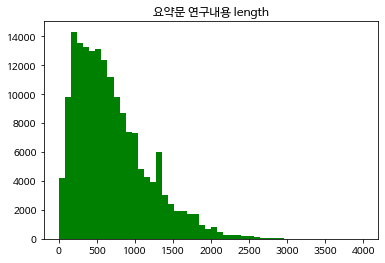

In [ ]:
plt.hist(train['요약문_연구내용'].astype(str).apply(len),bins=50,color='green')
plt.title('요약문 연구내용 length')
print("요약문_연구내용 length 최대값 : ",max(train['요약문_연구내용'].astype(str).apply(len)))
print("요약문_연구내용 length 최소값 : ",min(train['요약문_연구내용'].astype(str).apply(len)))
print("요약문_연구내용 length 평균값 : ",train['요약문_연구내용'].astype(str).apply(len).mean())
print("요약문_연구내용 length 중간값 : ",train['요약문_연구내용'].astype(str).apply(len).median())

{'boxes': [<matplotlib.lines.Line2D at 0x7febc4adb450>],
 'caps': [<matplotlib.lines.Line2D at 0x7febc4a7c390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7febc4a52cd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7febc4a52790>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7febc4a7ce10>,
  <matplotlib.lines.Line2D at 0x7febc4a7c8d0>]}

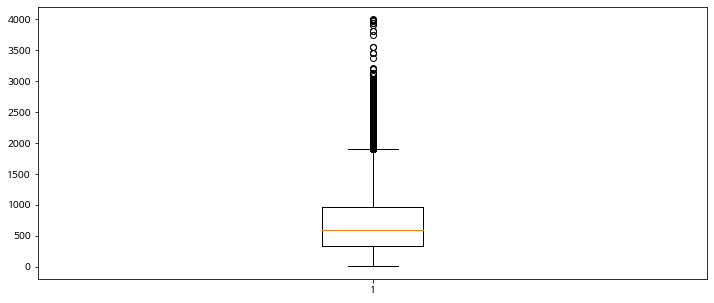

In [ ]:
plt.figure(figsize=(12,5))
plt.boxplot(train['요약문_연구내용'].astype(str).apply(len))

In [ ]:
#len == 1 인 경우
train[train['요약문_연구내용'].astype(str).apply(len)==1]

#0이나 . 들어가있음

#index = 135849 : 요약문_연구내용 = 0 인데 label = 18


,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
6647,6647,2017,개인기초연구(미래부),과학기술정보통신부,계속,자유공모,탄소나노튜브 템플릿 초전도 나노섬유 시트 및 실의 중시계 특성 및 응용성 연구,거대 자립지지 (free-standing) 탄소나노튜브 시트 위 형성된 초전도 나노...,0,0,"초전도 나노선,탄소나노튜브 시트,초전도 실,초전도 단일전자검출기,Nb 계열 초전도체...","SuperconductingNanowire,CarbonNanotubeSheet,Su...",0
7452,7452,2018,산학연협력기술개발(R&D),중소벤처기업부,신규,첫걸음 협력,GDI 엔진 350바 인젝터용 밸브시트 및 전용가공기 개발,0,0,0,"가솔린직접분사,인젝터,밸브시트,전용가공기,버","GDI,Injector,Valve seat,Processing machine,Burr",0
10816,10816,2019,국가기록관리활용기술연구개발(R&D),행정안전부,계속,연구개발 사업 전문성 강화 및 운영관리,2019년 국가기록원 연구개발 운영관리,NaN,·,NaN,NaN,NaN,0
19495,19495,2019,개인기초연구(과기정통부)(R&D),과학기술정보통신부,신규,기본연구,"이미지, 영상, 음성 데이터 분석을 통한 기술 인텔리전스 알고리듬 연구","◦ 본 연구는 향후 3년간 텍스트, 이미지, 영상, 음성 등 다양한 형태의 기술 데...",0,◦ 학문적으로 본 연구결과는 부상하는 비정형 데이터와 최신의 데이터분석 기법을 기술...,"기술 인텔리전스,이미지,영상,음성,비정형 데이터,분석 알고리듬,AI기반 예측 알고리듬","Technology intelligence,Image,Video,Audio,Unst...",0
22194,22194,2019,개인기초연구(과기정통부)(R&D),과학기술정보통신부,계속,중견연구(총연구비3억초과~5억이하),탄소나노튜브 템플릿 초전도 나노섬유 시트 및 실의 중시계 특성 및 응용성 연구,거대 자립지지 (free-standing) 탄소나노튜브 시트 위 형성된 초전도 나노...,0,0,"초전도 나노선,탄소나노튜브 시트,초전도 실,초전도 단일전자검출기,Nb 계열 초전도체...","Superconducting Nanowire,Carbon Nanotube Sheet...",0
33682,33682,2017,창업성장기술개발,중소벤처기업부,신규,창업기업과제,EV 배터리 폭발 방지용 극소 소화시스템 개발,0,0,0,"자동소화시스템,노벡-1230,전기차배터리,친환경소화약제,파우치형 소화기","Automatic fire extinguisher,Novec-1230,EV batt...",19
47561,47561,2017,개인기초연구(교육부),교육부,계속,기본연구지원사업,펩타이드 마개 실리카나노튜브 기반 단백질가수분해효소 감응형 나노센서/나노전달체 개발,본 연구는 세포내 작동 나노센서와 약물/유전자 전달용 나노구조복합체에 최적화된 구...,0,본 연구를 통해 확보될 단백질 가수분해 효소에 감응하는 peptide 마개를 가진 ...,"실리카 나노튜브,단백질 가수분해 효소,약물/유전자 전달,나노센서,효소 감응,기질금속...","SilicaNanotube,GoldNanoparticle,druggenedelive...",0
56725,56725,2017,산학연협력기술개발,중소벤처기업부,신규,첫걸음협력,페로니켈슬래그를 활용한 레미콘용 3성분계 콘크리트 개발,1. 기술개발의 개요\n\n\n- 본 연구는 철강산업 부산물인 페로니켈슬래그 및 포...,0,- 고로슬래그와 비교 시 페로니켈슬래그의 국내 공급이 원활하며 원가 절감 가능.\n...,"페로니켈슬래그,산업부산물,제철슬래그,혼화재,미세충진효과","Ferronickel-slag,gBy-product ,Ferrous-slag,Bin...",0
56735,56735,2018,창업성장기술개발(R&D),중소벤처기업부,신규,디딤돌 창업과제,중에너지를 이용한 반려동물전용 방사선 진단 및 치료 시스템,#NAME?,0,0,"엑스레이,반려동물,진단 및 치료,영상정합,치료계획","X ray,companion animal,Radiotherapy and diagno...",0
63799,63799,2018,개인기초연구(교육부)(R&D),교육부,신규,기본연구(1년~5년),만성염증피부질환에서 YAP/TAZ의 역할 규명,- 본 과제의 목표는 만성염증피부질환에서 YAP/TAZ의 역할 및 관련 병리기전을 ...,0,#NAME?,"만성염증피부질환 ,YAP,TAZ,아토피피부염 ,건선","Chronic inflammatory skin disease,YAP,TAZ,Atop...",0


In [ ]:
train[train['요약문_연구내용'].astype(str).apply(len)==5]

# 요약문 전부가 '평가관리비'

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
1677,1677,2018,인공지능바이오로봇의료융합기술개발(R&D)(다부처),다부처,신규,인공지능바이오로봇의료융합,인공지능바이오로봇의료융합사업 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT,0
2475,2475,2019,엔지니어링핵심기술개발(R&D),산업통상자원부,계속,엔지니어링핵심기술개발,엔지니어링핵심기술개발 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT,0
2670,2670,2018,안전인증역량강화(R&D),산업통상자원부,신규,안전인증역량강화,안전인증역량강화 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT,0
5595,5595,2019,중견조선소혁신성장개발(R&D),산업통상자원부,신규,중견조선소혁신성장개발사업,중견조선소혁신성장개발사업 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT,0
6252,6252,2018,우수기술연구센터(ATC)(R&D),산업통상자원부,계속,우수기술연구센터(ATC),우수기술연구센터(ATC) 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171457,171457,2019,지식서비스산업핵심기술개발(R&D),산업통상자원부,계속,지식서비스산업핵심기술개발,지식서비스산업핵심기술개발 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT,0
172786,172786,2016,시스템산업미래성장동력,산업통상자원부,신규,기획평가관리비,시스템산업미래성장동력 평가관리비,평가관리비,평가관리비,평가관리비,"평가관리비,평가관리비2,평가관리비3,평가관리비4,평가관리비5","management,management2,management3,management4...",0
173412,173412,2016,국민안전증진기술개발,산업통상자원부,계속,기획평가관리비,국민안전증진기술개발사업 평가관리비,평가관리비,평가관리비,평가관리비,"평가관리비,평가관리비2,평가관리비3,평가관리비4,평가관리비5","management,management2,management3,management4...",0
173559,173559,2019,차세대하이브리드PCB기술개발(R&D),산업통상자원부,신규,차세대 하이브리드 PCB 기술개발,차세대 하이브리드 PCB 기술개발 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT,0


In [ ]:
print("요약문_연구내용 length 최대값 : ",max(test['요약문_연구내용'].astype(str).apply(len)))
print("요약문_연구내용 length 최소값 : ",min(test['요약문_연구내용'].astype(str).apply(len)))
print("요약문_연구내용 length 평균값 : ",test['요약문_연구내용'].astype(str).apply(len).mean())
print("요약문_연구내용 length 중간값 : ",test['요약문_연구내용'].astype(str).apply(len).median())

요약문_연구내용 length 최대값 :  3827
요약문_연구내용 length 최소값 :  1
요약문_연구내용 length 평균값 :  702.3015650816964
요약문_연구내용 length 중간값 :  600.0


In [ ]:
test[test['요약문_연구내용'].astype(str).apply(len)==1]

#요약문_연구내용 0이 들어가있음

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드
1359,175663,2019,개인기초연구(교육부)(R&D),교육부,계속,기본연구(1년~3년),펩타이드 마개 실리카나노튜브 기반 단백질가수분해효소 감응형 나노센서/나노전달체 개발,본 연구는 세포내 작동 나노센서와 약물/유전자 전달용 나노구조복합체에 최적화된 구...,0,본 연구를 통해 확보될 단백질 가수분해 효소에 감응하는 peptide 마개를 가진 ...,"실리카 나노튜브,단백질 가수분해 효소,약물-유전자 전달,나노센서,효소 감응,기질금속...","Silica Nanotube,Gold Nanoparticle,drug-gene de..."
6746,181050,2018,개인기초연구(과기정통부)(R&D),과학기술정보통신부,계속,중견연구(총연구비3억초과~5억이하),탄소나노튜브 템플릿 초전도 나노섬유 시트 및 실의 중시계 특성 및 응용성 연구,거대 자립지지 (free-standing) 탄소나노튜브 시트 위 형성된 초전도 나노...,0,0,"초전도 나노선,탄소나노튜브 시트,초전도 실,초전도 단일전자검출기,Nb 계열 초전도체...","Superconducting Nanowire,Carbon Nanotube Sheet..."
18162,192466,2019,개인기초연구(과기정통부)(R&D),과학기술정보통신부,신규,(유형1-2)중견연구,빅 데이터의 신뢰-기반 탐색을 위한 실시간성 데이터 분석 플랫폼,‣ 빅 데이터로부터 지식을 창출하기 위해서 사람이 효과적으로 이해할 수 있는 형태로...,0,‣ 반응성 문제를 근본적으로 개선한 빅 데이터 시각화 플랫폼 개발\n- 데이터가 저...,"인지적 데이터 질의,낙관적 시각적 분석,신뢰-기반 탐색,스마트 데이터 액세스,지식 ...","Perceptual Data Querying,Optimistic Visual Ana..."
32497,206801,2019,개인기초연구(교육부)(R&D),교육부,계속,기본연구(1년~5년),만성염증피부질환에서 YAP/TAZ의 역할 규명,- 본 과제의 목표는 만성염증피부질환에서 YAP/TAZ의 역할 및 관련 병리기전을 ...,0,#NAME?,"만성염증피부질환 ,YAP,TAZ,아토피피부염 ,건선","Chronic inflammatory skin disease,YAP,TAZ,Atop..."


In [ ]:
#test 에도 요약문이 전부 평가관리비인 행 존재
test[test['요약문_연구내용'].astype(str).apply(len)==5]

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드
1391,175695,2019,전자부품산업핵심기술개발(R&D),산업통상자원부,계속,전자부품산업핵심기술개발사업,전자부품산업핵심기술개발사업 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT
3507,177811,2019,항공우주부품기술개발(R&D),산업통상자원부,계속,항공우주부품기술개발사업,항공우주부품기술개발사업 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT
4187,178491,2016,항공우주부품기술개발,산업통상자원부,계속,기획평가관리비,항공우주부품기술개발사업 평가관리비,평가관리비,평가관리비,평가관리비,"평가관리비,평가관리비2,평가관리비3,평가관리비4,평가관리비5","management,management2,management3,management4..."
5907,180211,2019,스마트공장용중소기업보급형로봇개발지원사업(R&D),산업통상자원부,신규,스마트공장용중소기업보급형로봇개발지원,스마트공장용중소기업보급형로봇개발지원 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT
6737,181041,2017,로봇산업핵심기술개발,산업통상자원부,계속,기획평가관리비,로봇산업핵심기술개발사업 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT
7409,181713,2019,표준안전기반구축(R&D),산업통상자원부,계속,표준안전기반구축,표준안전기반구축 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT
9392,183696,2019,AI기반자율주행컴퓨팅모듈개발및서비스실증(R&D),산업통상자원부,신규,AI기반자율주행컴퓨팅모듈개발및서비스실증사업,AI기반자율주행컴퓨팅모듈개발및서비스실증사업 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT
12117,186421,2018,시스템산업미래성장동력(R&D),산업통상자원부,계속,시스템산업미래성장동력,시스템산업미래성장동력 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT
12764,187068,2019,우수기술연구센터(ATC)(R&D),산업통상자원부,계속,우수기술연구센터(ATC),우수기술연구센터(ATC) 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT
12867,187171,2019,스마트공장협업패키지기술개발(R&D),산업통상자원부,신규,스마트공장협업패키지기술개발,스마트공장협업패키지기술개발 평가관리비,평가관리비,평가관리비,평가관리비,평가관리비,EVAL MANAGEMENT


##### 동일한 연구내용

In [ ]:
train['요약문_연구내용'].value_counts().to_frame().head(10)

,요약문_연구내용
"연구개발을 목적으로 대학·연구기관 등이 보유한 연구장비를 활용하는 중소기업에게 온라인 바우처(쿠폰) 방식으로 장비이용 지원 및 중소기업의 견구개발에 필요한 결과 도출을 위해 주관기관(대학, 연구기관 등)이 보유한 연구시설·장비 및 소프트웨어 활용을 지원",2041
보안과제정보,716
평가관리비,190
"가. 산학협력의 자율성 확대 및 내재화 ㅇ 각 대학별 여건과 특성에 따른 자율적 사업모델 개발 및 제시 ㅇ 산학협력 친화형 인사제도의 실질적 적용 강화 ㅇ 대학과 기업의 쌍방향 협력 체계 구축 및 활성화 ㅇ 대학별 자체적 산학협력 발전계획 수립 나. 산학협력의 다양화 및 지속가능성 제고 ㅇ 기술에서 지식으로 산학협력 문화 개선 ㅇ 문화·예술·콘텐츠 및 서비스, 글로벌 등 산학협력 모델 다양화 ㅇ 산업분야별 집중 지원 및 원스톱 정보 제공 ㅇ 지역사회와 연계강화 및 사회적 가치 창출 다. 사회맞춤형교육을 통한 취·창업 역량 강화 ㅇ 사회맞춤형 교육모델 확립을 통한 채용연계성 강화 ㅇ 기업의 참여 유도를 위한 제도개선 및 인센티브 강화 ㅇ 지역 및 중소·중견기업과 대학 간 협력체제 구축",185
"(사업내용) 미래 사회 변화에 대응하여 대학 기본역량 강화 및 전략적 특성화를 지원하고 대학의 자율 혁신을 통해 국가 혁신 성장의 토대가 되는 미래형 창의 인재 양성 체제 구축을 지원, (핵심가치) 자율강화, 혁신성장, 성과확산",109
- 핵심 과제에 대한 총괄 관리 및 연구의 종합적 발전과 실행 방안 도출\n\n\n&#8729; 핵심 1: 한국형 e-Navigation 서비스를 위한 핵심기술 연구개발\n\n\n&#8729; 핵심 2: e-Navigation 운영시스템 및 해사 디지털인프라 확충\n\n\n&#8729; 핵심 3: 국제표준 선도기술 연구개발\n\n\n- 연구의 실용적 활용 및 구축 후 즉각적으로 사용할 수 있는 양질의 성과물이 도출되도록 과제 및 동향 관리\n\n\n- 한국형 e-Navigation 사업 홍보\n\n\n- 법·제도 정책 제안 및 정책 기술 자문,69
"가. 산학협력 친화형 대학 체제 개편ㅇ 교수 업적평가 및 재임용.승진/승급 시 산학협력 관련 실적(기술이전, 특허, 현장실습 지도 등)을 반영하여 산학협력 친화형 교원인사제도 구축ㅇ 산업체 경력자의 산학협력중점교수 채용으로 산업체와 대학과의 연계 강화 및 교육, 연구, 취.창업 프로그램 등의 활성화 도모ㅇ 산학협력단 역할 및 위상 강화를 통한 대학 내 산학협력 지원과 네트워크의 허브로 구축나. 지역산업 및 산학협력 유형에 따른 특성화 교육프로그램 운영 ㅇ 대학의 특성화 분야 및 산업 수요를 반영한 현장 밀착형 교육 프로그램(특성화 트랙 등) 운영 ※ 연구소-기업 연계 교육과정 운영, 맞춤형 학과 및 계약학과 개설 등ㅇ 산업체 수요에 부합한 현장 맞춤형 인력양성 및 대학 내 창업교육센터, 현장실습 지원센터 설치를 통한 참여학생의 취.창업 역량강화 및 취업 연계 지원 - (현장교육 강화) 현장실무 프로그램 운영, 기업-학생간 연결 등을 지원하고 산학협력중점교수, 학과 담당 교수 등이 현장실습 사전교육, 현장지도 등 수행 - (창업교육 강화) 준비된 창업가를 육성할 수 있도록 창업교육 체제 구축 및 창업강좌·동아리 지원 확대를 통한 창업 역량 강화ㅇ 후진학 체제 마련을 통하여 취업 후에도 지속적으로 학업에 매진할 수 있도록 학과개설, 교육과정 개선 등 선취업-후진학 지원 강화 - 재직자 특별전형 운영, 주말반·야간반 확대, 산업체 현장경력의 학점 인정, 산학협력 학·석사 통합과정(5년제) 등 학사 운영 ※ 산업체 재직자 교육 지원 및 후진학 지원계획이 우수한 대학을 ‘후진학 선도대학’으로 지정하여 지원(총 10개교, 교당 2억원 지원)다. 지역 및 기업체 수요에 부응하는 기업 지원 활동 강화ㅇ 산학협력 협의체 구축 및 운영 및 기업에 대한 패키지형 종합 지원 시스템(AllSET 시스템) 구축을 통한 산학협력 연계체계 활성화 도모ㅇ 산업체 재직자 교육, 기업의 애로기술 자문 및 경영·마케팅 컨설팅 등을 통한 맞춤형 지원 강화ㅇ 교수의 연구년을 활용한 기업 파견근무 및 교수·학생·기업 공동 기술개발과제 수행 등을 통한 기업 지원과 학생 취업 연계라. 산학협력 인프라 확충ㅇ 산학협력 내실화 및 기업 지원을 위한 대학 내 공동활용 연구장비 시설의 집적화 - 공동활용연구장비의 대외 개방 및 기업과 연계한 온/오프라인 활용 시스템 구축 등을 통한 대학의 인적, 물적 지원 확대ㅇ 산학협력 성과모델 창출을 위하여 대학 내 기업지원을 위한 체제 및 네트워크 연계 체계 구축 - 산학협력 활동 증진을 위한 대학 내 기업지원 체제 구축 및 산학연계 네트워크의 종합적 관리.운영",55
"사회 수요중심의 학과개편과 정원 조정을 통한 양적 미스매치 해소, 사회 및 현장 맞춤형 교육과정 등 학생 진로 역량 강화를 통한 질적 미스매치 해소를 통한 학생 중심의 산업연계 교육활성화 선도대학 육성 및 지원",53
"인문학 진흥을 통한 지속가능한 국가발전(대학의 규모 및 설립유형, 중점육성분야 등 대학의 여건에 맞게 특화된 인문학 발전계획을 통합적 및 장기적으로 지원, 기초학문으로서 인문학의 역량과 위상강화 및 사회수요에 부응하는 인문학 육성)",52
"해양바이오산업신소재 기술은 해양생물이 생산하는 대사물질이나 해양생물의 생체기능을 이용하여 산업용 바이오소재를 개발하고 실용화하기 위한 기술을 개발함. 구체적으로 (1) 산업과 문화발전으로 생겨난 다양한 욕구를 충족시키는 생체에 사용할 수 있는 다기능의 산업신소재와 (2) 화학산업에서, 공해물질을 유발하는 화학공정을 대체할 수 있는, 해양생물학적 촉매기술과 해양생물공정에 의하여 얻을 수 있는 산업신소재를 개발하고 실용화하기 위한 기술 개발.",38


In [ ]:
train[train['요약문_연구내용']=='연구개발을 목적으로 대학·연구기관 등이 보유한 연구장비를 활용하는 중소기업에게 온라인 바우처(쿠폰) 방식으로 장비이용 지원 및 중소기업의 견구개발에 필요한 결과 도출을 위해 주관기관(대학, 연구기관 등)이 보유한 연구시설·장비 및 소프트웨어 활용을 지원']['label'].value_counts()


0     1944
19      43
45      11
18       9
5        8
16       7
29       6
28       3
27       3
25       1
24       1
23       1
20       1
14       1
8        1
6        1
Name: label, dtype: int64

In [ ]:
train[train['요약문_연구내용']=='보안과제정보']['label'].value_counts()


0     711
10      2
40      1
13      1
8       1
Name: label, dtype: int64

In [ ]:
train[train['요약문_연구내용']=='평가관리비']['label'].value_counts()


0     183
18      7
Name: label, dtype: int64

In [ ]:
test['요약문_연구내용'].value_counts().to_frame().head(10)

,요약문_연구내용
"연구개발을 목적으로 대학·연구기관 등이 보유한 연구장비를 활용하는 중소기업에게 온라인 바우처(쿠폰) 방식으로 장비이용 지원 및 중소기업의 견구개발에 필요한 결과 도출을 위해 주관기관(대학, 연구기관 등)이 보유한 연구시설·장비 및 소프트웨어 활용을 지원",467
보안과제정보,174
"가. 산학협력의 자율성 확대 및 내재화 ㅇ 각 대학별 여건과 특성에 따른 자율적 사업모델 개발 및 제시 ㅇ 산학협력 친화형 인사제도의 실질적 적용 강화 ㅇ 대학과 기업의 쌍방향 협력 체계 구축 및 활성화 ㅇ 대학별 자체적 산학협력 발전계획 수립 나. 산학협력의 다양화 및 지속가능성 제고 ㅇ 기술에서 지식으로 산학협력 문화 개선 ㅇ 문화·예술·콘텐츠 및 서비스, 글로벌 등 산학협력 모델 다양화 ㅇ 산업분야별 집중 지원 및 원스톱 정보 제공 ㅇ 지역사회와 연계강화 및 사회적 가치 창출 다. 사회맞춤형교육을 통한 취·창업 역량 강화 ㅇ 사회맞춤형 교육모델 확립을 통한 채용연계성 강화 ㅇ 기업의 참여 유도를 위한 제도개선 및 인센티브 강화 ㅇ 지역 및 중소·중견기업과 대학 간 협력체제 구축",45
"(사업내용) 미래 사회 변화에 대응하여 대학 기본역량 강화 및 전략적 특성화를 지원하고 대학의 자율 혁신을 통해 국가 혁신 성장의 토대가 되는 미래형 창의 인재 양성 체제 구축을 지원, (핵심가치) 자율강화, 혁신성장, 성과확산",35
평가관리비,32
"가. 산학협력 친화형 대학 체제 개편ㅇ 교수 업적평가 및 재임용.승진/승급 시 산학협력 관련 실적(기술이전, 특허, 현장실습 지도 등)을 반영하여 산학협력 친화형 교원인사제도 구축ㅇ 산업체 경력자의 산학협력중점교수 채용으로 산업체와 대학과의 연계 강화 및 교육, 연구, 취.창업 프로그램 등의 활성화 도모ㅇ 산학협력단 역할 및 위상 강화를 통한 대학 내 산학협력 지원과 네트워크의 허브로 구축나. 지역산업 및 산학협력 유형에 따른 특성화 교육프로그램 운영 ㅇ 대학의 특성화 분야 및 산업 수요를 반영한 현장 밀착형 교육 프로그램(특성화 트랙 등) 운영 ※ 연구소-기업 연계 교육과정 운영, 맞춤형 학과 및 계약학과 개설 등ㅇ 산업체 수요에 부합한 현장 맞춤형 인력양성 및 대학 내 창업교육센터, 현장실습 지원센터 설치를 통한 참여학생의 취.창업 역량강화 및 취업 연계 지원 - (현장교육 강화) 현장실무 프로그램 운영, 기업-학생간 연결 등을 지원하고 산학협력중점교수, 학과 담당 교수 등이 현장실습 사전교육, 현장지도 등 수행 - (창업교육 강화) 준비된 창업가를 육성할 수 있도록 창업교육 체제 구축 및 창업강좌·동아리 지원 확대를 통한 창업 역량 강화ㅇ 후진학 체제 마련을 통하여 취업 후에도 지속적으로 학업에 매진할 수 있도록 학과개설, 교육과정 개선 등 선취업-후진학 지원 강화 - 재직자 특별전형 운영, 주말반·야간반 확대, 산업체 현장경력의 학점 인정, 산학협력 학·석사 통합과정(5년제) 등 학사 운영 ※ 산업체 재직자 교육 지원 및 후진학 지원계획이 우수한 대학을 ‘후진학 선도대학’으로 지정하여 지원(총 10개교, 교당 2억원 지원)다. 지역 및 기업체 수요에 부응하는 기업 지원 활동 강화ㅇ 산학협력 협의체 구축 및 운영 및 기업에 대한 패키지형 종합 지원 시스템(AllSET 시스템) 구축을 통한 산학협력 연계체계 활성화 도모ㅇ 산업체 재직자 교육, 기업의 애로기술 자문 및 경영·마케팅 컨설팅 등을 통한 맞춤형 지원 강화ㅇ 교수의 연구년을 활용한 기업 파견근무 및 교수·학생·기업 공동 기술개발과제 수행 등을 통한 기업 지원과 학생 취업 연계라. 산학협력 인프라 확충ㅇ 산학협력 내실화 및 기업 지원을 위한 대학 내 공동활용 연구장비 시설의 집적화 - 공동활용연구장비의 대외 개방 및 기업과 연계한 온/오프라인 활용 시스템 구축 등을 통한 대학의 인적, 물적 지원 확대ㅇ 산학협력 성과모델 창출을 위하여 대학 내 기업지원을 위한 체제 및 네트워크 연계 체계 구축 - 산학협력 활동 증진을 위한 대학 내 기업지원 체제 구축 및 산학연계 네트워크의 종합적 관리.운영",15
- 핵심 과제에 대한 총괄 관리 및 연구의 종합적 발전과 실행 방안 도출\n\n\n&#8729; 핵심 1: 한국형 e-Navigation 서비스를 위한 핵심기술 연구개발\n\n\n&#8729; 핵심 2: e-Navigation 운영시스템 및 해사 디지털인프라 확충\n\n\n&#8729; 핵심 3: 국제표준 선도기술 연구개발\n\n\n- 연구의 실용적 활용 및 구축 후 즉각적으로 사용할 수 있는 양질의 성과물이 도출되도록 과제 및 동향 관리\n\n\n- 한국형 e-Navigation 사업 홍보\n\n\n- 법·제도 정책 제안 및 정책 기술 자문,15
"해양바이오산업신소재 기술은 해양생물이 생산하는 대사물질이나 해양생물의 생체기능을 이용하여 산업용 바이오소재를 개발하고 실용화하기 위한 기술을 개발함. 구체적으로 (1) 산업과 문화발전으로 생겨난 다양한 욕구를 충족시키는 생체에 사용할 수 있는 다기능의 산업신소재와 (2) 화학산업에서, 공해물질을 유발하는 화학공정을 대체할 수 있는, 해양생물학적 촉매기술과 해양생물공정에 의하여 얻을 수 있는 산업신소재를 개발하고 실용화하기 위한 기술 개발.",14
"사회 수요중심의 학과개편과 정원 조정을 통한 양적 미스매치 해소, 사회 및 현장 맞춤형 교육과정 등 학생 진로 역량 강화를 통한 질적 미스매치 해소를 통한 학생 중심의 산업연계 교육활성화 선도대학 육성 및 지원",13
자동1사업비조정에서 개발기간 변경1\n자동2사업비조정에서 개발기간 변경2\n자동3사업비조정에서 개발기간 변경3\n자동4사업비조정에서 개발기간 변경4\n자동5사업비조정에서 개발기간 변경5\n자동6사업비조정에서 개발기간 변경6\n자동7사업비조정에서 개발기간 변경7\n자동8사업비조정에서 개발기간 변경8\n자동9사업비조정에서 개발기간 변경9\n자동10사업비조정에서 개발기간 변경10\n자동11사업비조정에서 개발기간 변경11\n자동12사업비조정에서 개발기간 변경12,13


##### 한글 영어 특수문자

In [ ]:
#한글/영어외에 다른 문자(숫자 특수문자)가 포함된 case
train[train['요약문_연구내용'].str.contains('[^가-힣 ㄱ-ㅎ ㅏ-ㅣ a-z A-Z]')==True]['요약문_연구내용']

0         (가) 외래 및 돌발해충의 발생조사 및 종 동정\n\n\n    ○ 대상해충 : 최...
1         1차년도\n1) Microarray를 통한 선천적 TRAIL 내성 표적 후보 유전자...
2         * 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n- Tencel/...
3         # 소화기 암 진단용 분자영상 형광프로브 개발\n\n\n- 국소 도포형 소화기 암 ...
4         -In situ hybridization 검사의 정확성을 확인하기 위해 위암세포주 ...
                                ...                        
174299    ● 1차년: 혈관내막 증식과 관련된 표적분자 발굴 및 염증세포의 활성과 분화에 대한...
174300    본 연구에서는 여러 가지 유변물성 측정기술을 이용하여 고령자의 삼킴곤란 개선을 위해...
174301    ○ 공개된 식물 유전체 정보 및 대상 유전자 군 선발\n\n   - 공개된 식물 유...
174302    [1차 년도(2019)] \n\n1) 내건 및 내습성 유전자원 수집\n\n○ 기존 ...
174303    ◦ 1차년도 연구개발 내용\n   : 광섬유 비선형 굴절률 변화 효과를 이용한 광학...
Name: 요약문_연구내용, Length: 170253, dtype: object

In [ ]:
train[train['요약문_연구내용'].str.contains('\n')==True]['요약문_연구내용']
#\n 을 포함하는 경우가 많다.

0         (가) 외래 및 돌발해충의 발생조사 및 종 동정\n\n\n    ○ 대상해충 : 최...
1         1차년도\n1) Microarray를 통한 선천적 TRAIL 내성 표적 후보 유전자...
2         * 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n- Tencel/...
3         # 소화기 암 진단용 분자영상 형광프로브 개발\n\n\n- 국소 도포형 소화기 암 ...
4         -In situ hybridization 검사의 정확성을 확인하기 위해 위암세포주 ...
                                ...                        
174299    ● 1차년: 혈관내막 증식과 관련된 표적분자 발굴 및 염증세포의 활성과 분화에 대한...
174300    본 연구에서는 여러 가지 유변물성 측정기술을 이용하여 고령자의 삼킴곤란 개선을 위해...
174301    ○ 공개된 식물 유전체 정보 및 대상 유전자 군 선발\n\n   - 공개된 식물 유...
174302    [1차 년도(2019)] \n\n1) 내건 및 내습성 유전자원 수집\n\n○ 기존 ...
174303    ◦ 1차년도 연구개발 내용\n   : 광섬유 비선형 굴절률 변화 효과를 이용한 광학...
Name: 요약문_연구내용, Length: 144602, dtype: object

In [ ]:
train['요약문_연구내용'].loc[174300]

'본 연구에서는 여러 가지 유변물성 측정기술을 이용하여 고령자의 삼킴곤란 개선을 위해 물성조절 검 복합소재의 유변학적, 물리적 특성연구가 심도 있게 진행될 것이며, 이들 소재에 대해 염, 당, 온도와 pH 변화에 따른 유변물성 변화를 분석함으로써, 물성조절 검 복합소재의 유변학적 특성에 미치는 요인을 분석하여 유변물성이 개선되고 CLSM에 의한 구조 안정성이 우수한 물성조절소재를 선별한다. 선별된 미세 분말 물성조절소재의 용해성, 분산성, 유변물성 개선을 위해 유동층 과립화 공정(fluidized-bed granulation)을 적용하여 유변물성이 우수한 과립소재를 제조하고 과립공정 조건에 따른 유변물성 변화에 대한 기작을 분석하여 최적의 물성조절 과립소재를 선별한다. 최종적으로 유체식품에 적용하여 SAOS 등 다양한 유변물성 측정기술에 의해 유체식품의 주요 구성성분에 따른 점탄유변 특성 변화를 분석함으로써, 물성조절 유체식품의 유변학적 특성에 미치는 요인을 분석한다. 또한 Bolus 유변학 분석, 비디오 투시연하 검사(VFSS)와 구조분석을 통해 삼킴곤란 개선을 위한 물성조절 소재와 적용 물성조절 유체식품의 성분 상호작용에 대한 기작을 규명하여 최적의 유변물성 및 안전성이 확보된 삼킴곤란자를 위한 물성조절소재를 제시하는 것이다. 본 연구의 주요 연구내용은 다음과 같다.\n\n○ binary. tertiary 혼합시스템에서 다양한 물성조절 검복합 소재 조제 및 다양한 유변물성 측정기술에 의한 검복합 소재들의 유변학적 특성 분석\n\n○ 검복합 소재에 대해 염, 당 첨가 및 온도, pH 변화에 의한 유변학적 특성 변화 및 구조 안정성 분석을 통한 우수 검 복합소재 선별\n\n○ 미세 분말소재의 물성개선을 위한 유동층과립기에 의한 과립화 적용 및 Binder 특성에 의한 과립소재의 물리적, 유변학적 특성 개선 효과 분석\n\n○ 유동층과립화에 의한 검 복합소재의 유변물성 변화에 대한 기작 규명 및 삼킴곤란 개선을 위한 최적의 물리적, 유변학적 특성을 가진 과립형 

#### 요약문_기대효과

요약문_기대효과 length 최대값 :  3649
요약문_기대효과 length 최소값 :  1
요약문_기대효과 length 평균값 :  400.4864374885258
요약문_기대효과 length 중간값 :  329.0


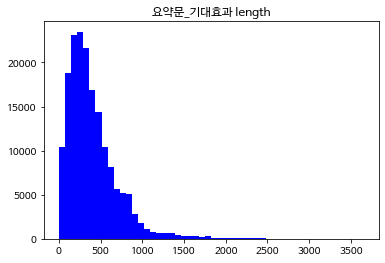

In [ ]:
plt.hist(train['요약문_기대효과'].astype(str).apply(len),bins=50,color='blue')
plt.title('요약문_기대효과 length')
print("요약문_기대효과 length 최대값 : ",max(train['요약문_기대효과'].astype(str).apply(len)))
print("요약문_기대효과 length 최소값 : ",min(train['요약문_기대효과'].astype(str).apply(len)))
print("요약문_기대효과 length 평균값 : ",train['요약문_기대효과'].astype(str).apply(len).mean())
print("요약문_기대효과 length 중간값 : ",train['요약문_기대효과'].astype(str).apply(len).median())

{'boxes': [<matplotlib.lines.Line2D at 0x7febd8977a90>],
 'caps': [<matplotlib.lines.Line2D at 0x7febc4c93550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7febc4f48210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7febc4f48150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7febc4ec5b90>,
  <matplotlib.lines.Line2D at 0x7febc4c93250>]}

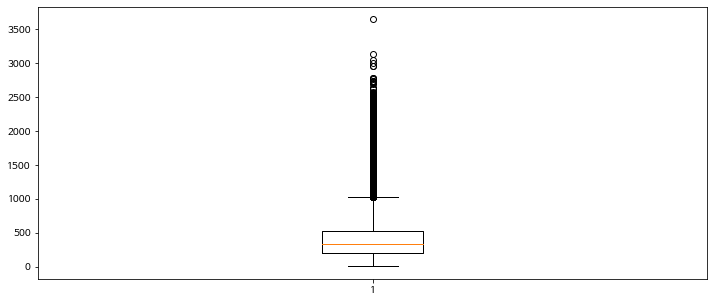

In [ ]:
plt.figure(figsize=(12,5))
plt.boxplot(train['요약문_기대효과'].astype(str).apply(len))

In [ ]:
train['요약문_기대효과'].value_counts()


대학 및 연구기관이 보유한 연구장비 공동활용율 증가 및 고가의 연구장비를 활용함에 있어 60~70% 이용료를 지원받아 중소기업의 기술경쟁력 향상 기반 마련                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 2041
보안과제정보                                                                                                                                                                                                                                                                                                      

In [ ]:
train[train['요약문_기대효과']=='대학 및 연구기관이 보유한 연구장비 공동활용율 증가 및 고가의 연구장비를 활용함에 있어 60~70% 이용료를 지원받아 중소기업의 기술경쟁력 향상 기반 마련']['label'].value_counts()


0     1944
19      43
45      11
18       9
5        8
16       7
29       6
28       3
27       3
25       1
24       1
23       1
20       1
14       1
8        1
6        1
Name: label, dtype: int64

In [ ]:
train[train['요약문_기대효과']=='보안과제정보']['label'].value_counts()


0     711
10      2
40      1
13      1
8       1
Name: label, dtype: int64

#### *보안과제정보

In [ ]:
#보안과제정보가 7개 써있는 행
train.loc[train.isin(['보안과제정보']).sum(axis=1).eq(7)]

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드,label
132,132,2018,이공학학술연구기반구축(R&D),교육부,계속,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,0
274,274,2017,바이오.의료기술개발,과학기술정보통신부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,0
298,298,2017,BK21플러스사업(0.5),교육부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,0
643,643,2016,항공우주부품기술개발,산업통상자원부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,0
945,945,2017,개인기초연구(교육부),교육부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173113,173113,2018,개인기초연구(교육부)(R&D),교육부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,0
173190,173190,2018,개인기초연구(과기정통부)(R&D),과학기술정보통신부,계속,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,0
173855,173855,2019,국제연구인력교류(R&D),과학기술정보통신부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,0
173871,173871,2018,개인기초연구(교육부)(R&D),교육부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,0


In [ ]:
train.loc[train.isin(['보안과제정보']).sum(axis=1).eq(7)]['label'].value_counts()

0     711
10      2
40      1
13      1
8       1
Name: label, dtype: int64

In [ ]:
#보안과제정보가 7개 써있는 행
test.loc[test.isin(['보안과제정보']).sum(axis=1).eq(7)]

,index,제출년도,사업명,사업_부처명,계속과제여부,내역사업명,과제명,요약문_연구목표,요약문_연구내용,요약문_기대효과,요약문_한글키워드,요약문_영문키워드
34,174338,2019,뇌과학원천기술개발(R&D),과학기술정보통신부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보
424,174728,2017,개인기초연구(교육부),교육부,계속,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보
766,175070,2017,개인기초연구(교육부),교육부,계속,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보
1102,175406,2019,개인기초연구(과기정통부)(R&D),과학기술정보통신부,계속,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보
1161,175465,2019,개인기초연구(과기정통부)(R&D),과학기술정보통신부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보
...,...,...,...,...,...,...,...,...,...,...,...,...
42704,217008,2019,개인기초연구(과기정통부)(R&D),과학기술정보통신부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보
42876,217180,2019,공정·품질기술개발(R&D),중소벤처기업부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보
42949,217253,2019,수상형태양광종합평가센터구축(R&D),산업통상자원부,신규,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보
43261,217565,2018,환경산업선진화기술개발사업(R&D),환경부,계속,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보,보안과제정보


# <column '과제명'>

 과제명과 label 만 이용한다.

In [ ]:
train01 = train[['과제명','요약문_연구내용','label']]
train01.head(10)

,과제명,요약문_연구내용,label
0,유전정보를 활용한 새로운 해충 분류군 동정기술 개발,(가) 외래 및 돌발해충의 발생조사 및 종 동정\n\n\n ○ 대상해충 : 최...,24
1,대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...,1차년도\n1) Microarray를 통한 선천적 TRAIL 내성 표적 후보 유전자...,0
2,비목질계 셀룰로오스 식물자원을 활용한 기능성 부직포 및 고부가가치 뷰티케어 faci...,* 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n- Tencel/...,0
3,소화기 암 진단용 분자영상 형광프로브 개발,# 소화기 암 진단용 분자영상 형광프로브 개발\n\n\n- 국소 도포형 소화기 암 ...,0
4,위암환자의 항암제반응예측을 위한 BRCA 발현검사,-In situ hybridization 검사의 정확성을 확인하기 위해 위암세포주 ...,0
5,국제 핵융합 재료조사시설(IFMIF)의 안정적 운전을 위한 고강도 빔 물리 연구,○ 1차년 (2017년): \n - IFMIF 빔 거동에 영향을 미치는 공간...,2
6,마이크로시스를 적용한 옥내·외 겸용 광케이블 개발,2. 2차년도 개발내용\n\n\n 2차년도 개발목표를 달성하기 위해서 개발해야...,0
7,임상·오믹스 정보 통합 개방형 플랫폼 구축 및 다기관 검증,1 단계\n\n1) CDM 기반 종적 임상?오믹스 정보 통합 개방형 플랫폼 구축\n...,0
8,IoT기반 수출배 선과장 물류체계화 기술개발,수출배 원물보관 환경에 따른 관리 기술개발\n\n\n수출배선과정보기반 bigdata...,0
9,지역 창조경제 생태계 활성화를 위한 바이오산업 인재 양성,<공동프로그램 추진 배경>\n\n ㅇ ‘지역신산업 선도인력 양성사업’ 지역대학 신청...,0


In [ ]:
test01=test[['과제명','요약문_연구내용']]
test01.head(10)

,과제명,요약문_연구내용
0,R-FSSW 기술 적용 경량 차체 부품 개발 및 품질 평가를 위한 64채널 C-SC...,○ 1차년도\n\n . 개발 탐촉 시스템의 성능 평가 위한 표준 시편 제작 시...
1,다입자계를 묘사하는 편미분방정식에 대한 연구,연구과제1. 무한입자계의 동역학 / 작용소(operator) 방정식에 대한 연구\n...
2,저출생체중아 가족을 위한 지역사회중심의 퇴원후 추후관리프로그램 개발,본 연구는 퇴원 후 저출생체중아의 퇴원 후 추후관리 프로그램 중 가정방문 모델과 가...
3,폴리싱용 5축 CNC 정밀 마이크로 시스템 개발,(1) 0.5~1㎛의 가공정밀도(면조도) 구현\n\n\n - 국내에서는 연삭기를 제...
4,다결정재료의 미세조직구조를 고려한 확률론적 응력부식균열 생성예측모델 개발,"총 연구기간은 3년으로, 연차별 연구내용 및 범위는 다음과 같다.\n\n ∙ 1차..."
5,DC 그리드용 차세대 DC 전력차단기에 관한 연구,연구내용\n\n(1) 새로운 고효율 DC 반도체 차단기(DC SSCB)에 관한 연구...
6,현존선을 LNG연료추진선으로 Retrofit하기 위한 기술개발,- 주관기관(선보유니텍(주)) :\n\n\n @ Retrofit 선박 대상 선종 ...
7,전이 암세포의 점탄성 관련 keratin 재구축 조절 타겟들의 암 미세환경에서의 역...,1. SPCDP1 (EMP2)가 암 미세환경의 변화에 미치는 영향 및 메커니즘 연구...
8,국민안전 분석기술 개발,○ 국민생활안전 조기진단 분석기술 및 신속분석키트 개발\n○ 난배양성 바이러스의 감...
9,선택적 방사선 감응 기반 차세대 고성능 양이온 이차전지용 세퍼레이터 개발,본 과제에서는 전자선의 감응 정도 제어를 통하여 선택적으로 고분자 소재의 가교를 유...


In [ ]:
# 1.한글 및 공백만 남겨두기
# 2.형태소 단위로 나눔 (kkma komoran okt 사용) : tokenization

"""
~ 정제 및 정규화
- 정제 : 갖고 있는 코퍼스로 부터 노이즈 데이터 제거
  불필요한 단어 = 노이즈 데이터를 제거
    불용어 제거
    등장 빈도가 적은 단어 제거
    길이가 짧은 단어 제거
- 정규화 : 표현 방법이 다른 단어들을 통합 시켜 같은 단어로

  한국어 ::: 어간 추출 (Stemming)
  용언(동사,형용사)는 어간(stem)과 어미(ending)의 결합
"""
# 3.불용어 제거 (remove_stopwords)
# 직접 불용어를 선정하는 경우 많음 . 조사, 접속사 등
# 보편적인 불용어 링크 https://www.ranks.nl/stopwords/korean



"""
정규 표현식 https://wikidocs.net/21703
모듈 re 사용
"""


'\n정규 표현식 https://wikidocs.net/21703\n모듈 re 사용 \n'

### 1) 전처리 preprocessing (tensorflow)


https://wikidocs.net/32105

토큰화 & 인덱스 벡터로

#### 토큰화 & 불용어 처리

In [ ]:
for i in range(34232,34242,1):

  print(okt.morphs(train01['과제명'][i]))
  print(okt.morphs(train01['요약문_연구내용'][i]))
  print()

['딥', '러닝', '기반', '비즈니스', '프로세스', '행동', '예측', '기술', '연구']
['본', '연구', '의', '목표', '인', '“', '비즈니스', '프로세스', '행동', '예측', '기법', '연구개발', '”', '을', '달성', '하기', '위해', '서', ',', '본', '연구', '에서는', '예측', '모듈', '을', '구현', '하기', '위', '한', '핵심', '기술', '로서', '딥', '러닝', '기술', '을', '적용', '한다', '.', '그', '중', '에서도', '의존', '성', '을', '가지는', '데이터', '(', '예', ':', '시계열', ',', '텍스트', ',', '음성', '데이터', ')', '에', '대한', '학습', '문제', '에', '우수한', '성능', '을', '보이는', '순환', '신경망', '(', 'Recurrent', 'Neural', 'Network', ')', '을', '비즈니스', '프로세스', '행동', '예측', '을', '위', '한', '분류기', '로', '구현', '하고자', '한다', '.', '\n\n', '이러한', 'RNN', '을', '중심', '으로', '본', '연구', '에서', '수행', '할', '세부', '연', '구', '내용', '을', '함축', '하면', ',', '1', ')', '이벤트', '로그', '전', '처리', '및', 'RNN', '학습', '기법', '과', '2', ')', 'RNN', '기반', '프로세스', '행동', '예측', '기법', '으로', '나뉜다', '.', '[', '이벤트', '로그', '전', '처리', '및', 'RNN', '학습', '기법', '연구', ']', '\n', ':', '딥', '러닝', '을', '이용', '한', '비즈니스', '프로세스', '행동', '예측', '모듈', '을', '구현', '하기', '위', '해서는', ',', '핵심', 

In [ ]:
print(okt.pos(train['과제명'][1]))
print(okt.pos(train['과제명'][1])[1])
print(okt.pos(train['과제명'][1])[1][1])

[('대장암', 'Noun'), ('의', 'Josa'), ('TRAIL', 'Alpha'), ('내', 'Determiner'), ('성', 'Noun'), ('표적', 'Noun'), ('인자', 'Noun'), ('발굴', 'Noun'), ('및', 'Noun'), ('TRAIL', 'Alpha'), ('반응', 'Noun'), ('예측', 'Noun'), ('유전자', 'Noun'), ('지도', 'Noun'), ('구축', 'Noun'), ('에', 'Josa'), ('관', 'Noun'), ('한', 'Josa'), ('연구', 'Noun')]
('의', 'Josa')
Josa


In [ ]:
"""
def preprocessing(text,okt,remove_stopwords=False,stopwords=[]): #default 지정

  #re.sub() = 문자열에서 정규 표현식과 일치하는 부분에 대해서 다른 문자열로 대체
  text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ]','',text)
  #형태소 분석
  wordtext = okt.morphs(text,stem=True)
  #불용어 제거
  if remove_stopwords:
    result = [word for word in wordtext if not word in stop_words]
    return result
"""


"\ndef preprocessing(text,okt,remove_stopwords=False,stopwords=[]): #default 지정\n\n  #re.sub() = 문자열에서 정규 표현식과 일치하는 부분에 대해서 다른 문자열로 대체\n  text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ]','',text)\n  #형태소 분석\n  wordtext = okt.morphs(text,stem=True)\n  #불용어 제거\n  if remove_stopwords:\n    result = [word for word in wordtext if not word in stop_words]\n    return result\n"

In [ ]:
#과제명과 요약문 (한글&영어 남기기)

#과제명
def preprocessing(text,okt,remove_stopwords=False,stopwords=[]): #default 지정

  #re.sub() = 문자열에서 정규 표현식과 일치하는 부분에 대해서 다른 문자열로 대체
  text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ]','',text)
  #형태소 분석
  wordtext = okt.morphs(text,stem=True)
  #불용어 제거
  if remove_stopwords:
    result = [word for word in wordtext if not word in stop_words]
    return result

#요약문
def preprocessing2(text,okt,remove_stopwords=False,stopwords=[]): #default 지정

  #re.sub() = 문자열에서 정규 표현식과 일치하는 부분에 대해서 다른 문자열로 대체
  text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-z A-Z]','',text)
  text = re.sub('\n','',text) #\n 은 없애기
  #형태소 분석
  wordtext = okt.morphs(text,stem=True)
  #불용어 제거
  if remove_stopwords:
    result = [word for word in wordtext if not word in stop_words]
    return result


In [ ]:
#stop_words=['이','가','로써','에서','에게서','부터','까지','에게','한테','께','와','과','을','를','의','로서','로']
#stop_words=['은','는','이','가', '하','아','것','들','의','있','되','수','보','주','등','한'] : 데이콘 기본
#'은','는','이','가','하','아','것','들','의','있','되','수','보','주','등',
#            '을','를','및','에','으로','로','에게','위한']


stop_words=['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등',
            '을','를','및','에','으로','로','에게','위','관','한','와','과','의한']


clean_train_text1=[]
clean_test_text1=[]

okt=Okt()


from tqdm import tqdm

for text in tqdm(train01['과제명']): #진행상황 tqdm
  try:
    clean_train_text1.append(preprocessing(text,okt,remove_stopwords=True,stopwords=stop_words))
  except:
    clean_train_text1.append([])



clean_train_text2=[]
clean_test_text2=[]

for text in tqdm(train01['요약문_연구내용']): #진행상황 tqdm
  try:
    clean_train_text2.append(preprocessing2(text,okt,remove_stopwords=True,stopwords=stop_words))
  except:
    clean_train_text2.append([])


 99%|█████████▉| 172368/174304 [4:10:43<04:16,  7.56it/s]

In [ ]:
pd.DataFrame(clean_train_text1)

""


In [ ]:
pd.DataFrame(clean_train_text2)

In [ ]:
clean_train_text = pd.concat([pd.DataFrame(clean_train_text1),pd.DataFrame(clean_train_text2)],axis=1)

In [ ]:
train01

,과제명,요약문_연구내용,label
0,유전정보를 활용한 새로운 해충 분류군 동정기술 개발,(가) 외래 및 돌발해충의 발생조사 및 종 동정\n\n\n ○ 대상해충 : 최...,24
1,대장암의 TRAIL 내성 표적 인자 발굴 및 TRAIL 반응 예측 유전자 지도 구축...,1차년도\n1) Microarray를 통한 선천적 TRAIL 내성 표적 후보 유전자...,0
2,비목질계 셀룰로오스 식물자원을 활용한 기능성 부직포 및 고부가가치 뷰티케어 faci...,* 식물계자원 정련 및 최적 신서란 파이버 기초연구 개발\n\n\n- Tencel/...,0
3,소화기 암 진단용 분자영상 형광프로브 개발,# 소화기 암 진단용 분자영상 형광프로브 개발\n\n\n- 국소 도포형 소화기 암 ...,0
4,위암환자의 항암제반응예측을 위한 BRCA 발현검사,-In situ hybridization 검사의 정확성을 확인하기 위해 위암세포주 ...,0
...,...,...,...
174299,혈관내막 증식을 치료하기 위한 표적분자 발굴,● 1차년: 혈관내막 증식과 관련된 표적분자 발굴 및 염증세포의 활성과 분화에 대한...,0
174300,삼킴곤란 개선을 위한 물성조절 식품시스템에서의 유동층과립 복합소재의 유변물성 변화 ...,본 연구에서는 여러 가지 유변물성 측정기술을 이용하여 고령자의 삼킴곤란 개선을 위해...,0
174301,식물 유전체 정보 고도화 및 핵심 유전자 군 진화연구,○ 공개된 식물 유전체 정보 및 대상 유전자 군 선발\n\n - 공개된 식물 유...,0
174302,"콩 유전자원 내건성, 내습성 대량평가 체계구축 및 자원선발",[1차 년도(2019)] \n\n1) 내건 및 내습성 유전자원 수집\n\n○ 기존 ...,23


In [ ]:
test01

,과제명,요약문_연구내용
0,R-FSSW 기술 적용 경량 차체 부품 개발 및 품질 평가를 위한 64채널 C-SC...,○ 1차년도\n\n . 개발 탐촉 시스템의 성능 평가 위한 표준 시편 제작 시...
1,다입자계를 묘사하는 편미분방정식에 대한 연구,연구과제1. 무한입자계의 동역학 / 작용소(operator) 방정식에 대한 연구\n...
2,저출생체중아 가족을 위한 지역사회중심의 퇴원후 추후관리프로그램 개발,본 연구는 퇴원 후 저출생체중아의 퇴원 후 추후관리 프로그램 중 가정방문 모델과 가...
3,폴리싱용 5축 CNC 정밀 마이크로 시스템 개발,(1) 0.5~1㎛의 가공정밀도(면조도) 구현\n\n\n - 국내에서는 연삭기를 제...
4,다결정재료의 미세조직구조를 고려한 확률론적 응력부식균열 생성예측모델 개발,"총 연구기간은 3년으로, 연차별 연구내용 및 범위는 다음과 같다.\n\n ∙ 1차..."
...,...,...
43571,포장용 인디케이팅 잉크 제조기술 개발 및 인쇄 공정 기술 개발,■ 포장용 인티케이팅 잉크의 신뢰성 확보 \n\n\n■ 포장용 인티케이팅 잉크의 양...
43572,루시아-신속/정확/저렴한 현장진단용 혁신적 혈액진단 개발,1) 본 연구팀이 보유하고 있는 특허기술인 C-ECL은 전세계에 존재하는 두 개의 ...
43573,ITER 삼중수소 저장·공급 DU용기 개발 및 시험,ITER SDS DU bed의 개발 제작 및 삼중수소 저장?공급 및 in-bed c...
43574,무결정립계 금속 초박막의 제조 및 이를 활용한 기초 연구,본 연구실의 연구는 크게 다음과 세 영역으로 구성되어 있음. \n금속 초박막 합성 ...


In [ ]:
for text in tqdm(test['과제명']): #진행상황 tqdm
  try:
    clean_test_text1.append(preprocessing(text,okt,remove_stopwords=True,stopwords=stop_words))
  except:
    clean_test_text1.append([])

for text in tqdm(test['요약_연구내용']): #진행상황 tqdm
  try:
    clean_test_text2.append(preprocessing2(text,okt,remove_stopwords=True,stopwords=stop_words))
  except:
    clean_test_text2.append([])

 66%|██████▌   | 28708/43576 [17:48<16:53, 14.67it/s]

In [ ]:
clean_test_text = pd.concat([pd.DataFrame(clean_test_text1),pd.DataFrame(clean_test_text2)],axis=1)


In [ ]:
print(clean_train_text.shape)
print(clean_test_text.shape)


#토큰화 (의미있는 단위로만) & 불용어 제거된 데이터

174304
43576
174304
43576


#### 인덱스 벡터로

https://han-py.tistory.com/284


In [ ]:
#텐서플로우 사용
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer() #토큰화 & 정수 인코딩. 말뭉치를 벡터화

#단어 집합 생성
tokenizer.fit_on_texts(clean_train_text) #문자 데이터를 입력받고 리스트의 형태로 반환


word_vocab=tokenizer.word_index # 단어와 숫자 키-값 쌍의 딕셔너리. (소문자 변환 & 구두점 제거 자동으로)


#정수 인코딩
train_sequences = tokenizer.texts_to_sequences(clean_train_text) #텍스트 안 단어들을 숫자 시퀀스 형태로
test_sequences = tokenizer.texts_to_sequences(clean_test_text)

train_sequences2 = tokenizer.texts_to_sequences(clean_train_text2) #텍스트 안 단어들을 숫자 시퀀스 형태로
test_sequences2 = tokenizer.texts_to_sequences(clean_test_text2)


#패딩처리
#병렬연산을 위해 여러 문장의 길이를 동일하게 맞춰준다.
#첫번째인자=패딩할데이터 maxlen=정규화할길이 padding='pre'면 앞에 0 'post'면 뒤에 0 을 추가하여 시퀀스 패딩.
#maxlen=40 ((과제명 length 평균값 : 35.8425))
train_inputs = pad_sequences(train_sequences, maxlen=40,padding='post') #같은 길이의 시퀀스로 변환=어레이로 만든다.
test_inputs = pad_sequences(test_sequences, maxlen=40, padding='post')

train_inputs = pad_sequences(train_sequences, maxlen=40,padding='post') #같은 길이의 시퀀스로 변환=어레이로 만든다.
test_inputs = pad_sequences(test_sequences, maxlen=40, padding='post')


In [ ]:
print(train_inputs.shape)


(174304, 40)


In [ ]:
len(set(np.array(train['label']))) #set : unique 한 것들만

46

In [ ]:
labels=np.array(train['label']) #label 을 array 로
len(set(labels))

46

In [ ]:
#추후 재사용 가능하도록 npy로 전환
DATA_IN_PATH='./data_in/'
TRAIN_INPUT_DATA = 'train_input.npy'
TEST_INPUT_DATA = 'test_input.npy'

import os
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)

np.save(open(DATA_IN_PATH+TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH+TEST_INPUT_DATA, 'wb'), test_inputs)

import json
data_configs={}
data_configs['vocab']=word_vocab #word_vocab=tokenizer.word_index . 단어와 숫자 키-값 쌍
data_configs['vocab_size'] = len(word_vocab)+1 #쌍들의 개수 +1 = 사이즈
json.dump(data_configs, open(DATA_IN_PATH+'data_configs.json', 'w'), ensure_ascii=False)
#메모리 상에 data_configs 데이터를 저장해놓는다.

### 임베딩 Embedding

In [ ]:
"""
vocab_size= #단어 집합의 크기. 총 단어 개수
embedding_dim= #결과로 나오는 임베딩 벡터 크기
Embedding(vocab_size, embedding_dim , input_length = ) #input_length : 입력 시퀀스 길이
"""

"""
ex.
# 3. 위 정수 인코딩 데이터가 아래의 임베딩 층의 입력이 된다.
vocab_size = 7
embedding_dim = 2
Embedding(vocab_size, embedding_dim, input_length=5)

# 각 정수는 아래의 테이블의 인덱스로 사용되며 Embedding()은 각 단어마다 임베딩 벡터를 리턴한다.
+------------+------------+
|   index    | embedding  |
+------------+------------+
|     0      | [1.2, 3.1] |
|     1      | [0.1, 4.2] |
|     2      | [1.0, 3.1] |
|     3      | [0.3, 2.1] |
|     4      | [2.2, 1.4] |
|     5      | [0.7, 1.7] |
|     6      | [4.1, 2.0] |
+------------+------------+
"""

' \nex.\n# 3. 위 정수 인코딩 데이터가 아래의 임베딩 층의 입력이 된다.\nvocab_size = 7\nembedding_dim = 2\nEmbedding(vocab_size, embedding_dim, input_length=5)\n\n# 각 정수는 아래의 테이블의 인덱스로 사용되며 Embedding()은 각 단어마다 임베딩 벡터를 리턴한다.\n+------------+------------+\n|   index    | embedding  |\n+------------+------------+\n|     0      | [1.2, 3.1] |\n|     1      | [0.1, 4.2] |\n|     2      | [1.0, 3.1] |\n|     3      | [0.3, 2.1] |\n|     4      | [2.2, 1.4] |\n|     5      | [0.7, 1.7] |\n|     6      | [4.1, 2.0] |\n+------------+------------+\n'

### 모델링
#### Sequential API로 모델 만들기
모델 구성하기 (Keras)
https://wikidocs.net/32105


In [ ]:
from keras import models
from keras import layers

In [ ]:
import sklearn
from sklearn.metrics import log_loss, accuracy_score,f1_score
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
# <파라미터 설정> = 임베딩

vocab_size = data_configs['vocab_size'] #총 단어개수 = 데이터 쌍들의 개수 + 1
embedding_dim = 32 #결과로 나오는 임베딩 벡터 크기
#임베딩의 결과는 (vocab_size, embedding_dim)의 형태를 갖는 2차원 어레이
max_length=40 # 최대 길이
oov_tok="<OOV>" #oov_token
"""
(토큰화 되어있지 않은 단어들) OOV 로 등록되어 있지 않은 단어가 들어오면 1로 만들어준다.
"""


'\n(토큰화 되어있지 않은 단어들) OOV 로 등록되어 있지 않은 단어가 들어오면 1로 만들어준다.\n'

In [ ]:
# 가벼운 NLP 모델

"""
참고 자료
model = tf.keras.Sequential() #Sequential 객체 생성
! 층 추가 !
model.add(layers.Embedding(vocab_size, emb_size, input_length=4)) #embedding 층으로 입력값을 임베딩 한다
model.add(layers.Lambda(lambda x: tf.reduce_mean(x,axis=1))) #다음층에 넣기 위해 입력값들의 평균을 내어 다음 layer에 넣어준다
model.add(layers.Dense(hidden_dimension, activation='relu')) #hidden layer = layer 사이에 들어간
model.add(layers.Dense(output_dimension, activation='sigmoid')) #activation : 활성화 함수. sigmoid = 출력값의 합이 1이 되게끔
"""
#몇개의 레이어를 사용할지, 각 레이어를 위해 몇개의 뉴런을 사용할지를 결정해야 .
#4개의 레이어로 구성되는 모델을 생성합니다.
#https://webnautes.tistory.com/1284



#https://wikidocs.net/32105


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense

model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length), #임베딩 레이어
      tf.keras.layers.GlobalAveragePooling1D(), #GlobalAveragePooling1D 레이어를 사용할 수 있습니다.

      #Dense() 전결합층 추가
      tf.keras.layers.Dense(128, activation='relu'), #주로 은닉층 relu
      #출력 뉴런이 128개인 fully-connected layer(Dense)에 입력 벡터를 통과시킵니다.
      #다중클래스 분류문제에서는 클래스 수만큼 출력 뉴런이 필요
      tf.keras.layers.Dense(46,activation='softmax') #다중클래스분류의 출력층 softmax
      #출력층
])



In [ ]:
"""
Dense layer 주요 인자 https://tykimos.github.io/2017/01/27/MLP_Layer_Talk/
    첫번째 인자 : 출력 뉴런의 수
    input_dim : 입력 뉴런의 수
    init : 가중치 초기화 방법 설정합니다.
      -‘uniform’ : 균일 분포
      -‘normal’ : 가우시안 분포
    activation : 활성화 함수 설정합니다.
      -‘linear’ : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력.
      -‘relu’ : rectifier 함수, 은닉층에 주로 !
      -'sigmoid’ : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
        입력된 데이터에 대해서 0과 1 사이의 값을 출력하여 해당 값이 둘 중 하나에 속할 확률
      -‘softmax’ : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.
        세 개 이상의 선택지 중에서 고르는 경우
"""

" \nDense layer 주요 인자 https://tykimos.github.io/2017/01/27/MLP_Layer_Talk/\n    첫번째 인자 : 출력 뉴런의 수\n    input_dim : 입력 뉴런의 수\n    init : 가중치 초기화 방법 설정합니다.\n      -‘uniform’ : 균일 분포\n      -‘normal’ : 가우시안 분포\n    activation : 활성화 함수 설정합니다.\n      -‘linear’ : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력.\n      -‘relu’ : rectifier 함수, 은닉층에 주로 !\n      -'sigmoid’ : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.\n        입력된 데이터에 대해서 0과 1 사이의 값을 출력하여 해당 값이 둘 중 하나에 속할 확률 \n      -‘softmax’ : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.\n        세 개 이상의 선택지 중에서 고르는 경우 \n"

Dense(1,input_dim=3,activation='relu')

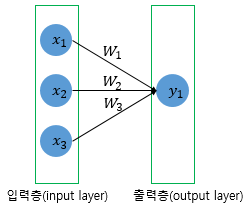

In [ ]:
#model summary : 모델 정보 요약
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 32)            973088    
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dense_1 (Dense)             (None, 46)                5934      
                                                                 
Total params: 983,246
Trainable params: 983,246
Non-trainable params: 0
_________________________________________________________________
None


### 컴파일 & 훈련


손실함수와 활성화 함수 조합

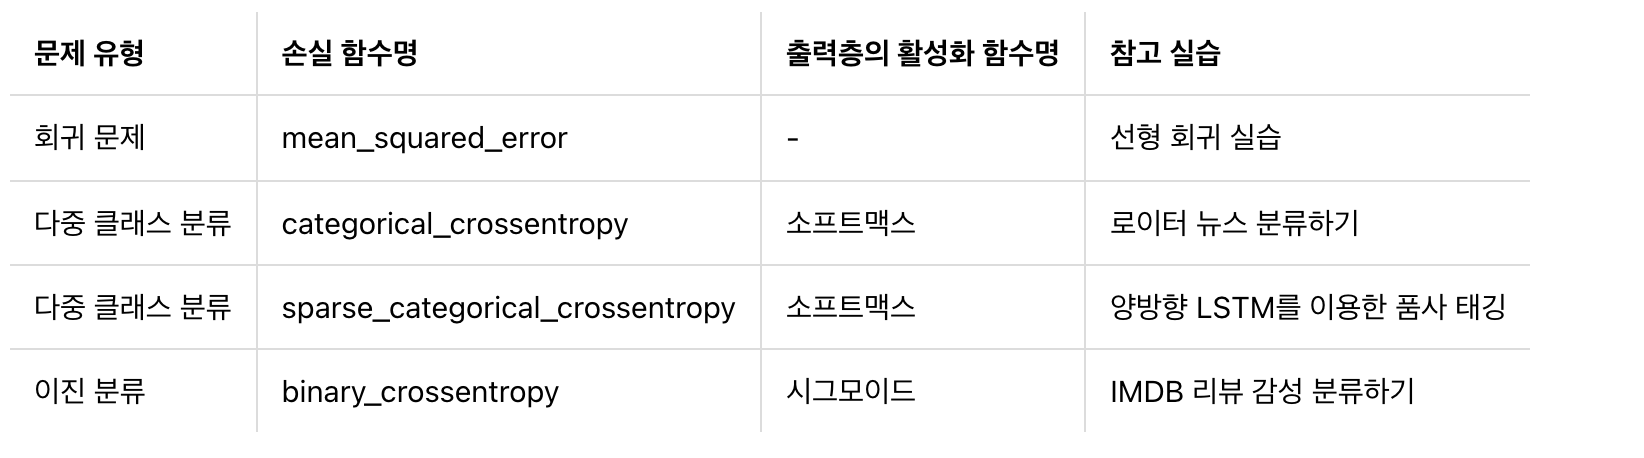

In [ ]:
# compile model
# https://89douner.tistory.com/274

model.compile(loss='sparse_categorical_crossentropy', #손실 함수
              optimizer='adam', #optimizer : Adam 최적화 알고리즘
              metrics=['accuracy']) #accuracy 를 지표로


#model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 32)            973088    
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dense_1 (Dense)             (None, 46)                5934      
                                                                 
Total params: 983,246
Trainable params: 983,246
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#fit model(학습 진행)
num_epochs=30
history= model.fit(train_inputs, #훈련 데이터 X
                   labels, #레이블 데이터
                   epochs=num_epochs, #학습 반복 주기
                   verbose=2, #0 = silent, 1 = progress bar, 2 = one line per epoch. (0,1,2 중 선택 )
                   validation_split = 0.2 ) #데이터셋 0.8 : 0.2 비율로 나누어 학습

Epoch 1/30
4358/4358 - 66s - loss: 0.9351 - accuracy: 0.8199 - val_loss: 0.8117 - val_accuracy: 0.8245 - 66s/epoch - 15ms/step
Epoch 2/30
4358/4358 - 54s - loss: 0.6796 - accuracy: 0.8385 - val_loss: 0.6436 - val_accuracy: 0.8465 - 54s/epoch - 12ms/step
Epoch 3/30
4358/4358 - 55s - loss: 0.5352 - accuracy: 0.8638 - val_loss: 0.5819 - val_accuracy: 0.8572 - 55s/epoch - 13ms/step
Epoch 4/30
4358/4358 - 56s - loss: 0.4452 - accuracy: 0.8807 - val_loss: 0.5255 - val_accuracy: 0.8674 - 56s/epoch - 13ms/step
Epoch 5/30
4358/4358 - 59s - loss: 0.3795 - accuracy: 0.8945 - val_loss: 0.4980 - val_accuracy: 0.8736 - 59s/epoch - 13ms/step
Epoch 6/30
4358/4358 - 59s - loss: 0.3310 - accuracy: 0.9050 - val_loss: 0.4781 - val_accuracy: 0.8789 - 59s/epoch - 14ms/step
Epoch 7/30
4358/4358 - 57s - loss: 0.2931 - accuracy: 0.9140 - val_loss: 0.4824 - val_accuracy: 0.8809 - 57s/epoch - 13ms/step
Epoch 8/30
4358/4358 - 56s - loss: 0.2647 - accuracy: 0.9216 - val_loss: 0.4692 - val_accuracy: 0.8849 - 56s/ep

### 예측 & 결과제출

In [ ]:
pred = model.predict(test_inputs)
pred = tf.argmax(pred,axis=1) #가장 큰 값의 인덱스를 반환 . #axis = 1 : 열 방향으로 |||0 이면 행방향

In [ ]:
sample['label'] = pred
sample
sample.to_csv('baseline.csv', index=False)